# analysis of pp-SRC c.m. momentum simulations

# imports

In [1]:
from notebook_tools import *
import ast
import matplotlib.patches as patches
import random
%matplotlib inline

Welcome to ROOTaaS 6.06/02


/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
nominal_values=dict({'SigmaT_C12':0.167,'SigmaT_err_C12':0.006,
                     'a1_C12':0.143,'a1_err_C12':0.075,'a2_C12':0.158,'a2_err_C12':0.009,
                     'b1_C12':0.562,'b1_err_C12':0.078,'b2_C12':0.159,'b2_err_C12':0.009})

# read data

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs600000to6018605_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv',na_filter=0.0)
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs700000to756268_100SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv',na_filter=0.0)
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs800000to1000000_20SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_20NRand_results.csv',na_filter=0.0)
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs1000000to1100000_20SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv',na_values=0.0)
sims = sims[sims.run>1000000]
sims.fillna(0,inplace=True)
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1100000to1400000_30SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv',na_values=0.0)
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1100000to1400000_30SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv',na_values=0.0)

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1100000to1400000_30SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv',na_values=0.0)

In [16]:
# read all our runs results
sims_files = []
sims_list , sims_files = os.listdir('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/') , [] 
for file in sims_list:                                                                                        
    print 'adding ',file
    sims_files.append(pd.read_csv(('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/'+file)))

sims=pd.concat(sims_files)
sims.fillna(0.0,inplace=True)
print 'len:',len(sims) 

adding  runs1000000to1100000_20SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv
adding  runs1100000to1400000_30SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv
adding  runs1400000to1500000_results.csv
adding  runs1500000to1501000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1501000to1502000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1502000to1503000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1503000to1504000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1504000to1505000_NsigmaT_1_NSigmaZa1_1000_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1_NRand_10_simulationruns_results.csv
adding  runs1505000to1506000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1000_NMeanZa1_1_NMeanZa2_1_NRand_10_simulationruns_results.csv
adding  runs150

In [3]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1600000to1760000_results.csv')


variable "pd" not defined.

variable "pd.re" not defined.


In [44]:
# PvalTotal
for target in ['12C','27Al','56Fe','208Pb']:
    sims['PvalTotal_%s'%target] = Fisher_combination_Pvals_pandas([sims['PvalSigmaX_unweighted_%s'%target],
                                                                   sims['PvalSigmaY_unweighted_%s'%target],
                                                                   sims['PvalSigmaZa1_unweighted_%s'%target],
                                                                   sims['PvalSigmaZa2_unweighted_%s'%target], 
                                                                   sims['PvalMeanZa1_unweighted_%s'%target],
                                                                   sims['PvalMeanZa2_unweighted_%s'%target]         
                                                                  ])
    print 'average PvalTotal %s:'%target,np.average(sims['PvalTotal_%s'%target])

average PvalTotal 12C: 0.00359139285207
average PvalTotal 27Al: 0.0035880104266
average PvalTotal 56Fe: 0.00011195778913
average PvalTotal 208Pb: 0.00348588918504


In [5]:
def draw_PvalWeighting_2d( df , v1 , v2 , bins=40 ,
                          weights=None, w_label=None , cmap='Greys' ,
                          xlabel=None , ylabel=None ,                         
                          figsize=(10,10), title=None, do_save_fig=False,
                          do_add_nominal_values=False, suffix='',      
                          nominal_v1=None,nominal_v1_err=None,                       
                          nominal_v2=None,nominal_v2_err=None,
                          x_ranges=None,y_ranges=None):
    
    fig,ax=plt.subplots(figsize=figsize)
    sum_weights = len(df)*np.average(df[v1],weights=weights)
    print 'sum_weights:',sum_weights
    plt.hist2d(df[v1],df[v2],bins=bins,weights=weights/sum_weights,cmap=cmap); # 0.01 offset to draw the plot nicely
    ax.add_patch( patches.Rectangle((np.min(df[v1]), np.min(df[v2])),
                                     np.max(df[v1])-np.min(df[v1]) ,
                                     np.max(df[v2])-np.min(df[v2]),        
                                     fill=True, linewidth=3 , color='green', alpha=0.1
                                    ))
#     print 'min of ',v1,'is',np.min(df[v1])
#     print 'max of ',v1,'is',np.max(df[v1])
#     print 'min of ',v2,'is',np.min(df[v2])
#     print 'max of ',v2,'is',np.max(df[v2])
    if y_ranges is None:
        ax.set_ylim(np.min(df[v2])-0.1*np.abs(np.min(df[v2])),np.max(df[v2])+0.1*np.abs(np.max(df[v2])))
    else: 
        ax.set_ylim(y_ranges)
    if x_ranges is None:
        ax.set_xlim(np.min(df[v1])-0.1*np.abs(np.min(df[v1])),np.max(df[v1])+0.1*np.abs(np.max(df[v1])))
    else: 
        ax.set_xlim(x_ranges)


    cb=plt.colorbar()
    cb.ax.tick_params(labelsize=30)
    set_axes( ax , xlabel , ylabel , fontsize=30)
    if do_add_nominal_values:
           
        ax.add_patch( patches.Rectangle((nominal_v1-nominal_v1_err, nominal_v2-nominal_v2_err),
                                        2*nominal_v1_err,
                                        2*nominal_v2_err,        
                                        fill=False, linewidth=3 , color='blue'
                                       ))

    if do_save_fig: 
        plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/Appendix_D/figures/AccCorr_'+v1+'_'+v2+'_'+w_label+suffix+'.pdf')
    



In [6]:
def draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2' ,
                              xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                              bins=40,
                              figsize=(10,10),
                              weights=None,
                              w_labels=None,
                              do_save_fig=False,
                              draw_generated=False,
                              do_add_nominal_values=False, 
                              nominal_v1=None,nominal_v1_err=None,                                                            
                              nominal_v2=None,nominal_v2_err=None,
                              do_draw=None,suffix='',
                              x_ranges=None,y_ranges=None):
    
    for weight,w_label,do_showplot in zip(weights,w_labels,do_draw):
        
        if weight is None:
            if draw_generated and do_showplot:
                draw_PvalWeighting_2d( sims , 'gen'+v1 , 'gen'+v2 , bins=bins , weights=weight, w_label=w_label  , cmap='hot_r' ,
                                  xlabel=xlabel,ylabel=ylabel, figsize=figsize , title='no weighting' , do_save_fig=do_save_fig);
        elif do_showplot:
            print 'ploting histogram weighted by',weight
            title=weight
            weight=sims[weight]
            draw_PvalWeighting_2d( sims , 'gen'+v1 , 'gen'+v2 , bins=bins , weights=weight, w_label=w_label  , cmap='hot_r' ,
                                  xlabel=xlabel,ylabel=ylabel, figsize=figsize , title=title , do_save_fig=do_save_fig,
                                  do_add_nominal_values=do_add_nominal_values,
                                  nominal_v1=nominal_v1,
                                  nominal_v1_err=nominal_v1_err,
                                  nominal_v2=nominal_v2,
                                  nominal_v2_err=nominal_v2_err,
                                  suffix=suffix,x_ranges=x_ranges,y_ranges=y_ranges);



In [7]:
def plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]',binsy=30,
                                      v1='SigmaX',xlabel='$\\sigma_{x}$ [Gev/c]', binsx=30,
                                      target='12C',do_save_fig=False,
                                      do_add_nominal_values=False,
                                      nominal_v1=None,nominal_v1_err=None,
                                      nominal_v2=None,nominal_v2_err=None,
                                      do_draw=None,suffix='',                             
                                      x_ranges=None,y_ranges=None): 
    
    weights = [None , 'PvalSigmaT%s_%s'%(v2,target) , 'PvalTotal_unweighted_%s'%target, 'Pvaltot_pandas_%s'%target, 'PvalTotal'  ]
    w_labels = ['NoWeights','PvalSigmaT%s_%s'%(v2,target),'PvalTotal_%s'%target,'Pvaltot_pandas_%s'%target ,'PvalTotal_%s'%target]
    
    draw_all_PvalWeighting_2d(v1=v1 , v2=v2 ,
                              xlabel=xlabel,ylabel=ylabel ,
                              bins=(binsx,binsy),
                              figsize=(15,10),
                              weights=weights, 
                              w_labels=w_labels,
                              do_add_nominal_values=do_add_nominal_values,
                              do_save_fig=do_save_fig,
                              nominal_v1=nominal_v1,
                              nominal_v1_err=nominal_v1_err,
                              nominal_v2=nominal_v2,
                              nominal_v2_err=nominal_v2_err,
                              do_draw=do_draw,
                              suffix=suffix,x_ranges=x_ranges,y_ranges=y_ranges)



# histograms of generated, and generated+weighted

In [8]:
def draw_single_parameter_gen_rec(sims=None,var='SigmaZa1',name='a1'):
    fig=plt.figure(figsize=(40,10))
    ax=fig.add_subplot(141)
    plt.scatter(sims['gen'+var],sims['rec'+var+'_unweighted']);
    ax.add_patch( patches.Rectangle((np.min(sims['gen'+var]),nominal_values[name+'_C12']-nominal_values[name+'_err_C12']),                                
                                    np.max(sims['gen'+var])-np.min(sims['gen'+var]),                                      
                                    2*nominal_values[name+'_err_C12'],                                 
                                    fill=False, linewidth=3 , color='blue'                               
                                   ))
    set_axes(ax,'gen '+name,'rec '+name,fontsize=25)
    ax=fig.add_subplot(142)
#     plt.hist([sims['gen'+var],sims['gen'+var],sims['gen'+var]],weights=[np.ones(len(sims)),sims['Pval'+var+'_unweighted_12C'],sims['Pval'+var+'_tw_12C']],label=['none','Pval','Pval-tw']);
    plt.hist([sims['gen'+var],sims['gen'+var]],weights=[np.ones(len(sims)),sims['Pval'+var+'_unweighted_12C']],label=['none','Pval']);
    set_axes(ax,'gen '+name,'',fontsize=25)

    ax=fig.add_subplot(143)
    plt.hist(sims['gen'+var],weights=sims['Pval'+var+'_unweighted_12C']);
    set_axes(ax,'gen '+name,'',fontsize=25)

    ax=fig.add_subplot(144)
    plt.hist(sims['gen'+var],weights=sims['Pval'+var+'_tw_12C']);
    set_axes(ax,'gen '+name,'',fontsize=25)

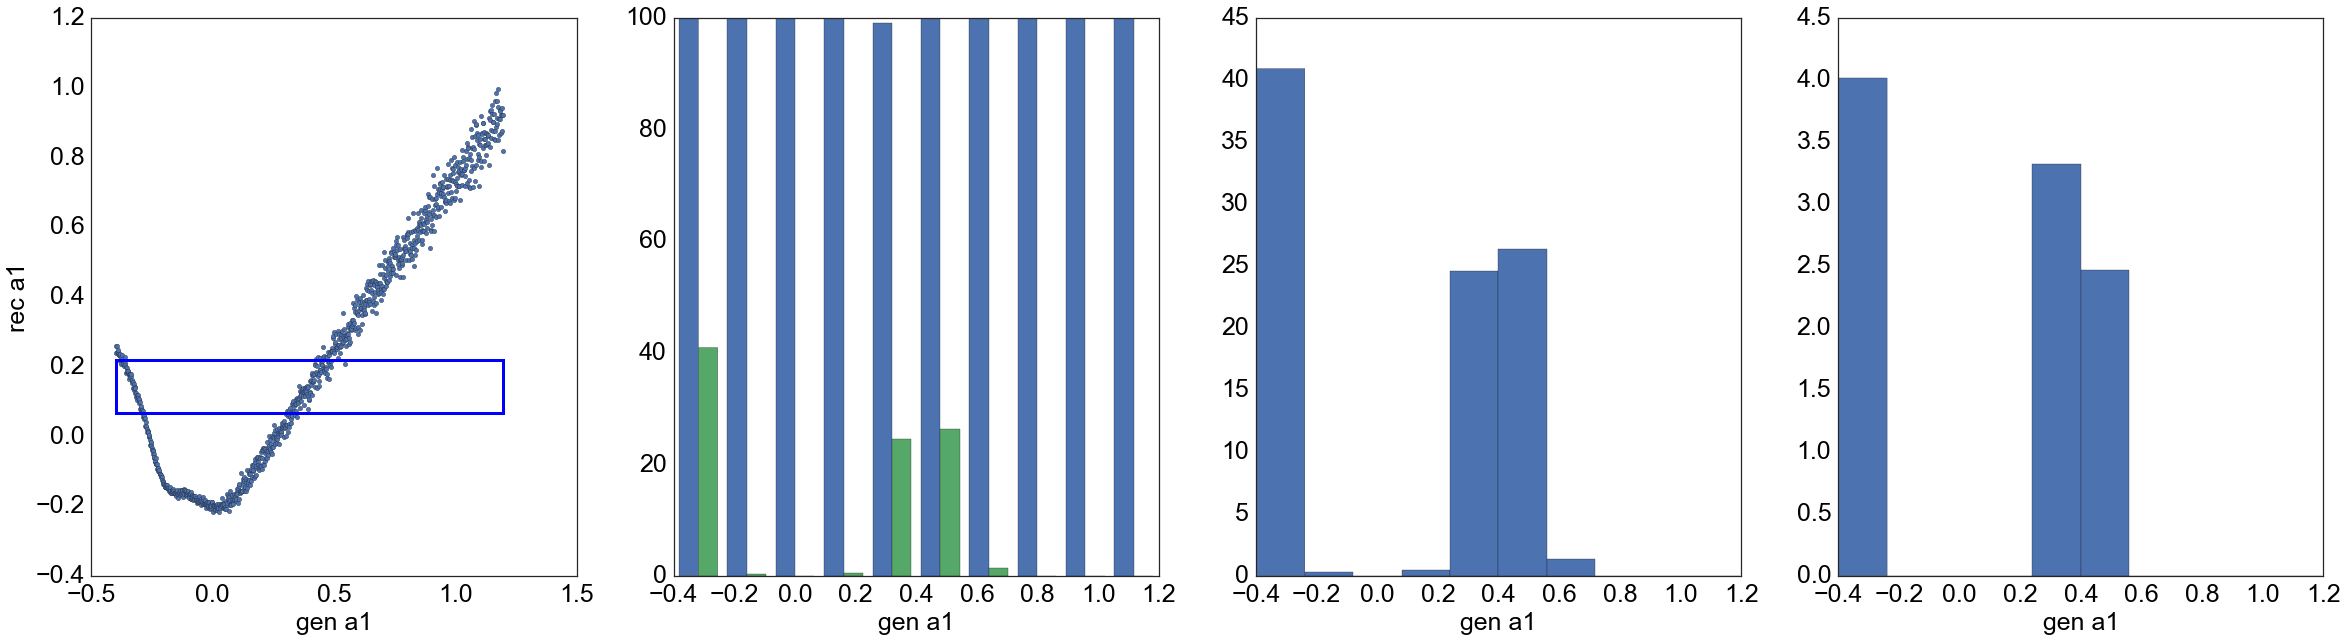

In [31]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1504000to1505000_NsigmaT_1_NSigmaZa1_1000_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1_NRand_10_simulationruns_results.csv',na_values=0.0)
sims.fillna(0,inplace=True)
draw_single_parameter_gen_rec(sims=sims,var='SigmaZa1',name='a1')

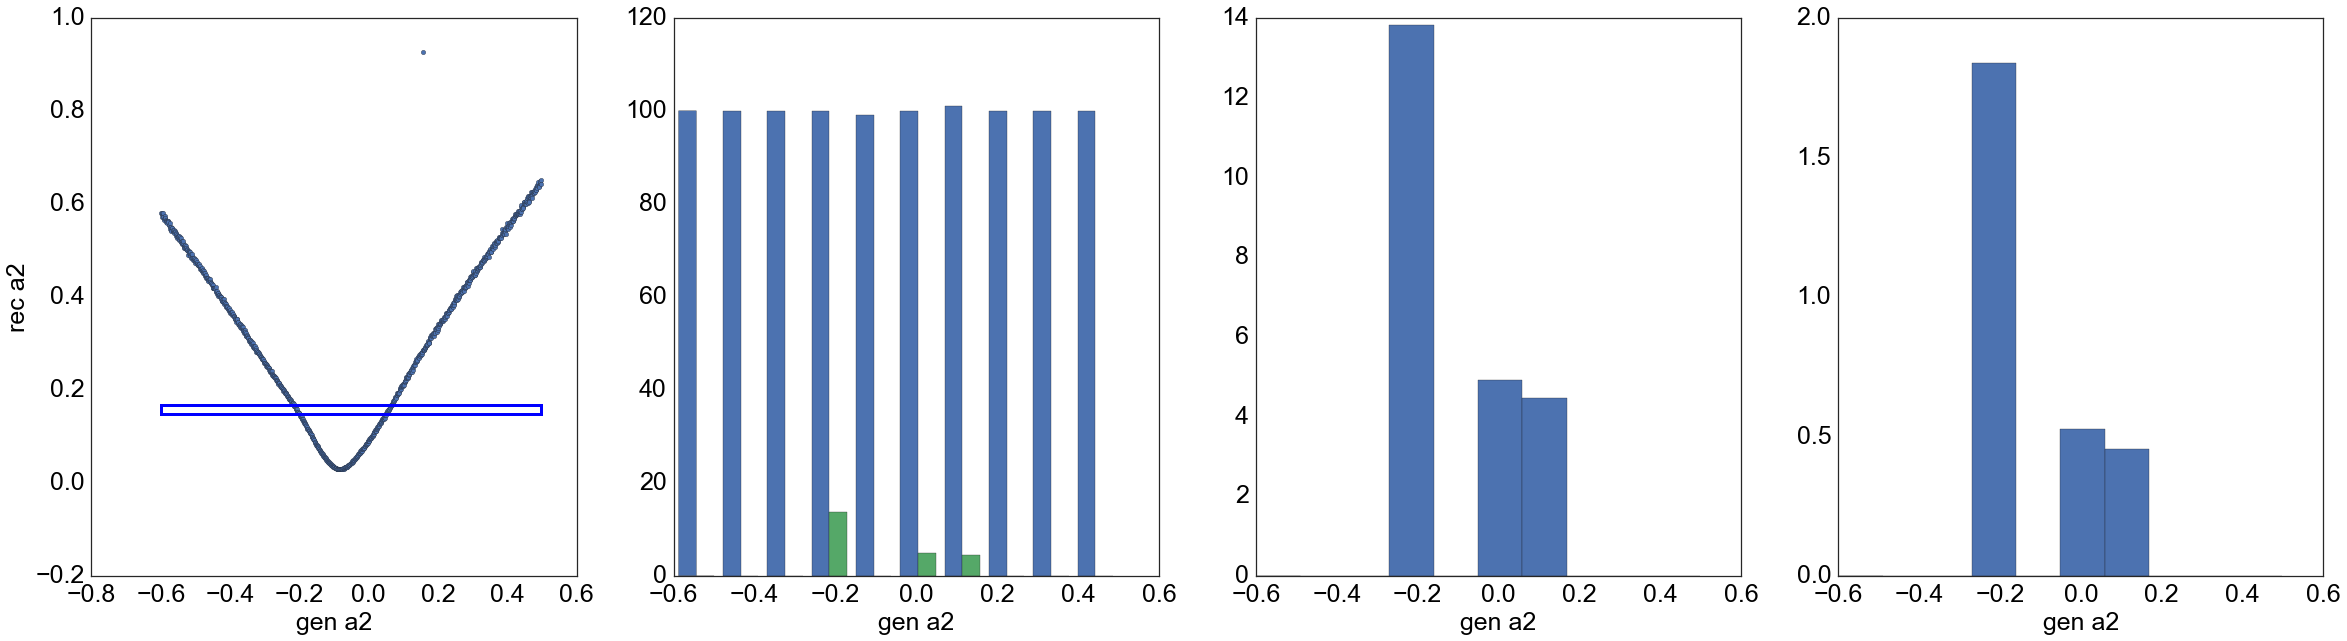

In [32]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1505000to1506000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1000_NMeanZa1_1_NMeanZa2_1_NRand_10_simulationruns_results.csv',na_values=0.0)
sims.fillna(0,inplace=True)
draw_single_parameter_gen_rec(sims=sims,var='SigmaZa2',name='a2')

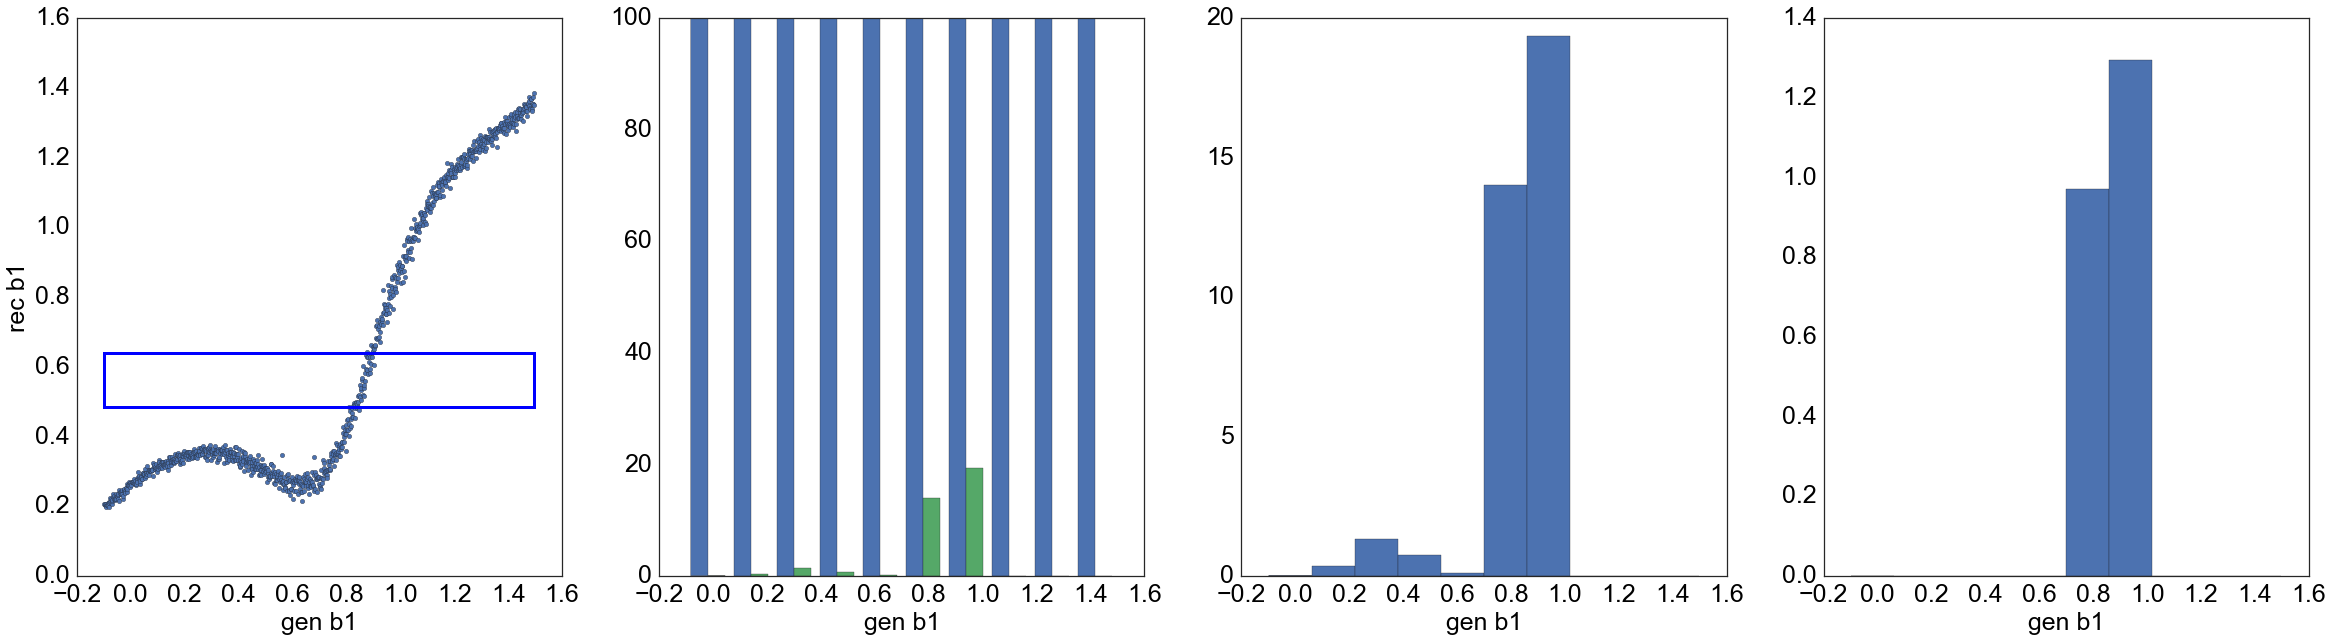

In [33]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1506000to1507000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv',na_values=0.0)
sims.fillna(0,inplace=True)
draw_single_parameter_gen_rec(sims=sims,var='MeanZa1',name='b1')

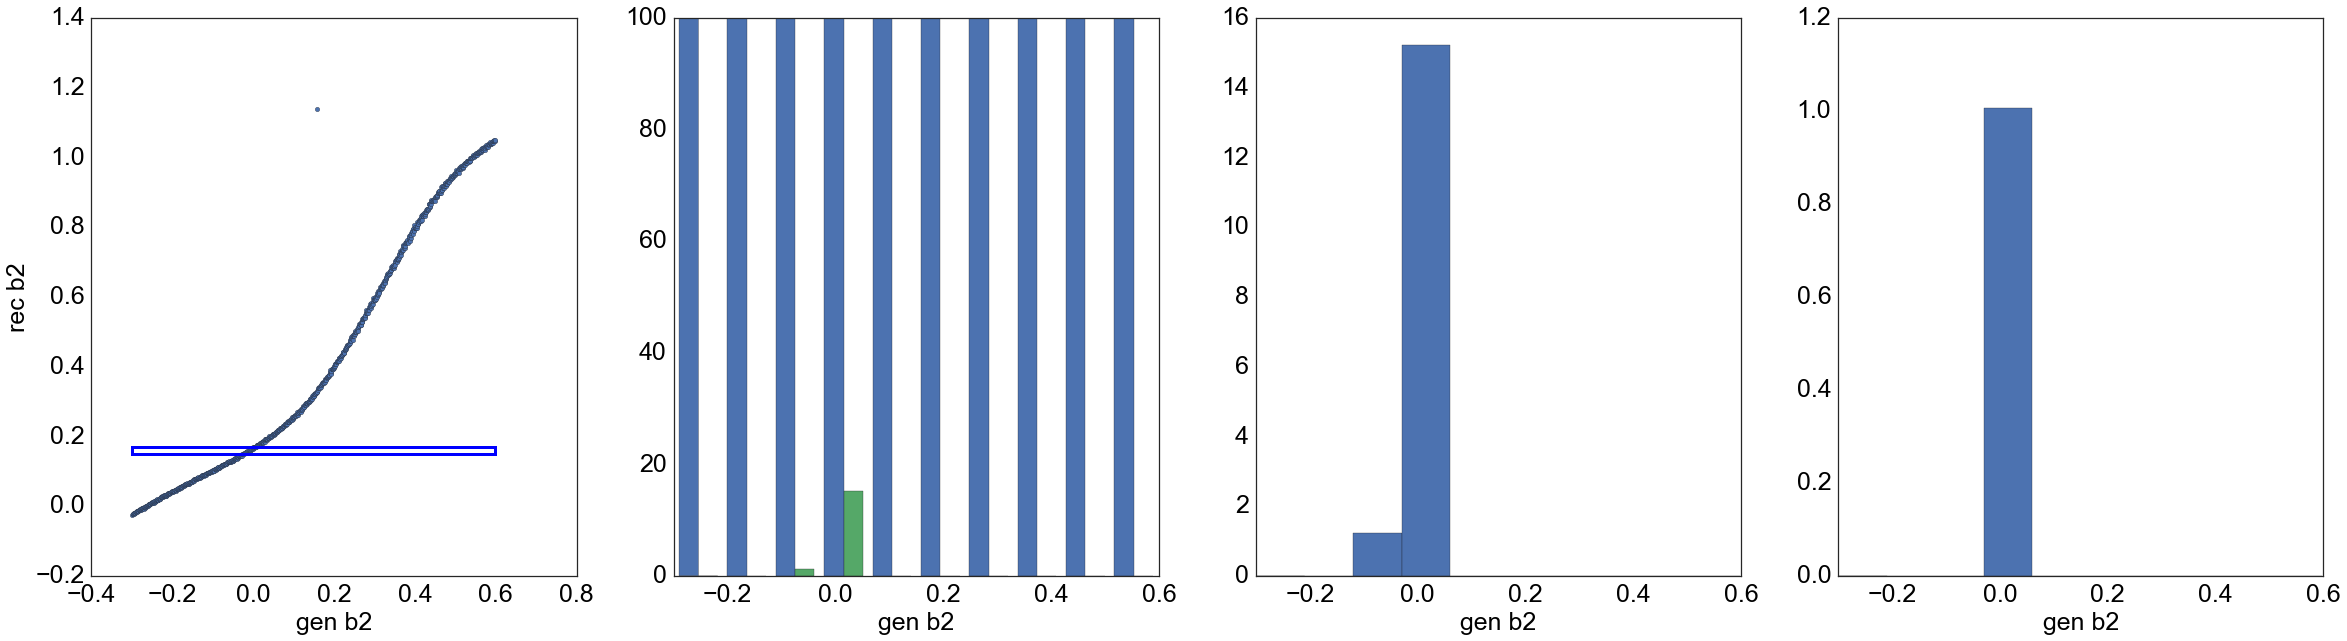

In [34]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1507000to1508000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv',na_values=0.0)
sims.fillna(0,inplace=True)
draw_single_parameter_gen_rec(sims=sims,var='MeanZa2',name='b2')

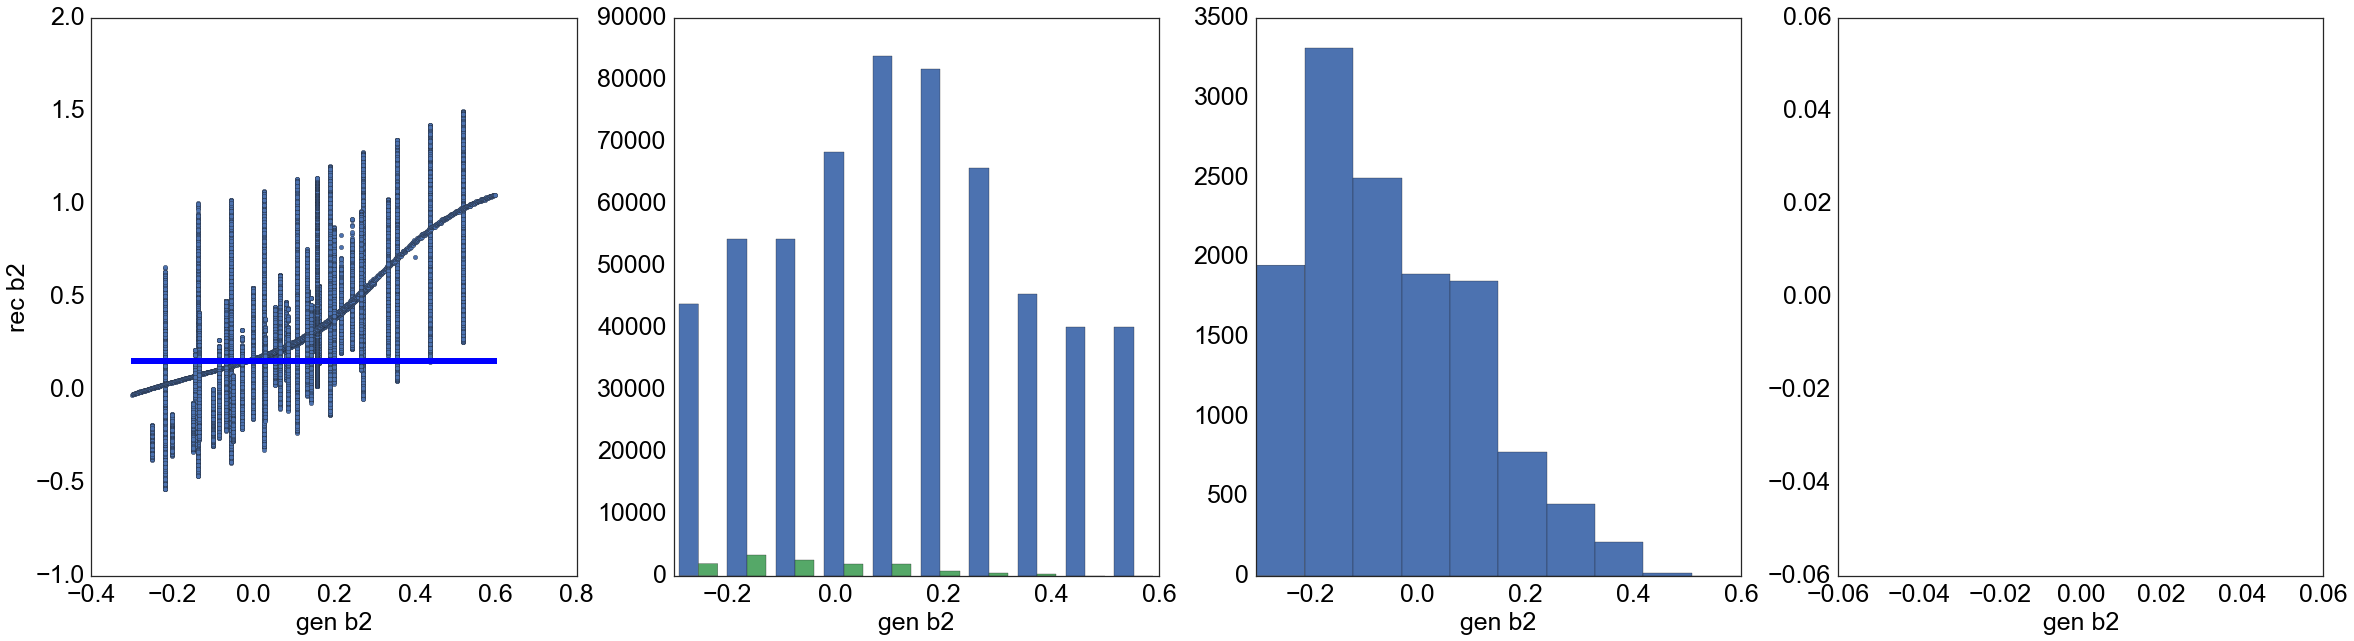

In [15]:
draw_single_parameter_gen_rec(sims=sims[sims>-100],var='MeanZa2',name='b2')

ploting histogram weighted by PvalSigmaTSigmaZa1_12C
sum_weights: 93749.378149
ploting histogram weighted by PvalTotal
sum_weights: 97823.979889
ploting histogram weighted by PvalSigmaTSigmaZa2_12C
sum_weights: 94101.7100632
ploting histogram weighted by PvalTotal
sum_weights: 97823.979889
ploting histogram weighted by PvalSigmaTMeanZa1_12C
sum_weights: 92061.0608577
ploting histogram weighted by PvalTotal
sum_weights: 97823.979889
ploting histogram weighted by PvalSigmaTMeanZa2_12C
sum_weights: 93114.2349305
ploting histogram weighted by PvalTotal
sum_weights: 97823.979889


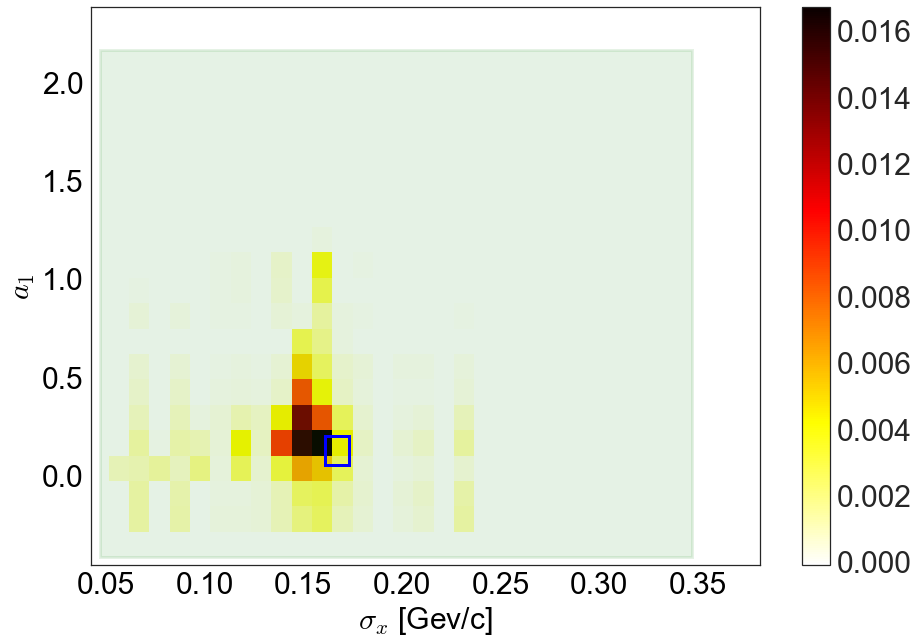

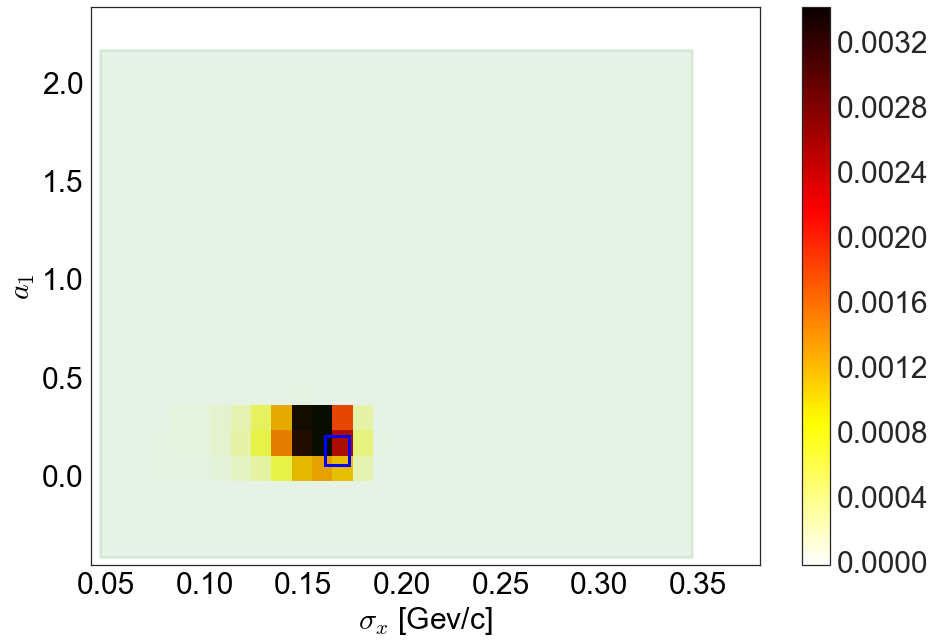

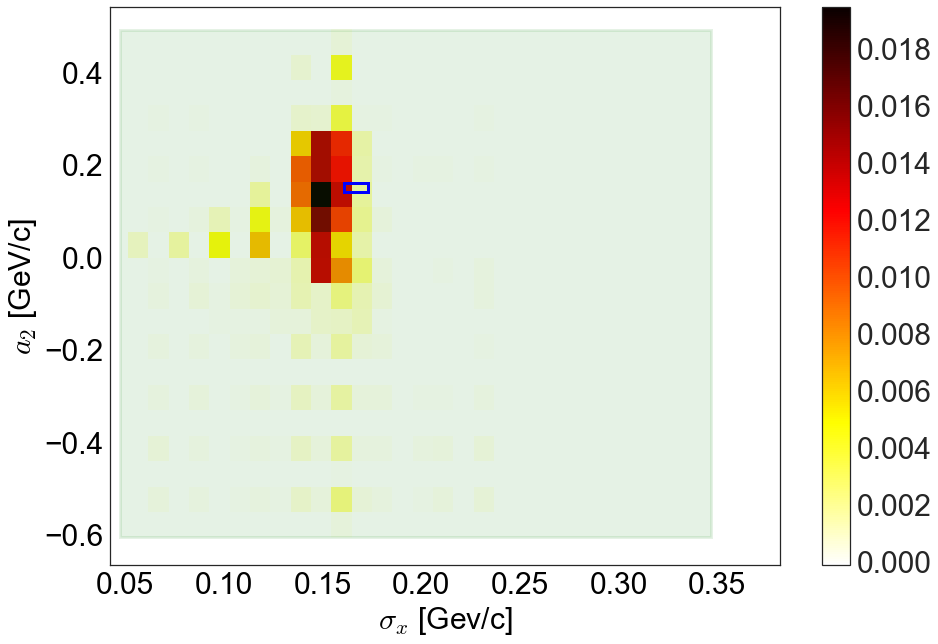

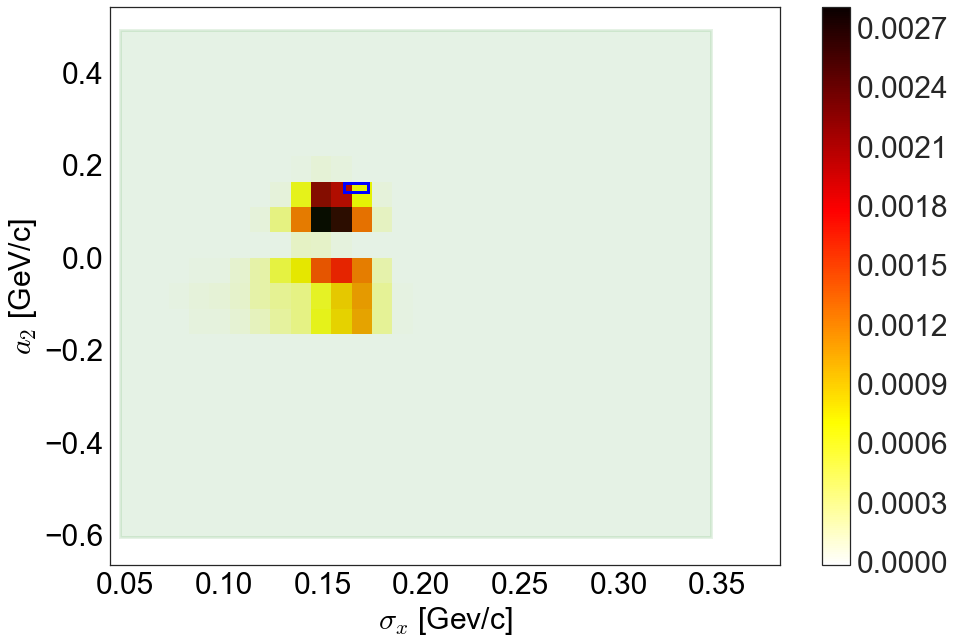

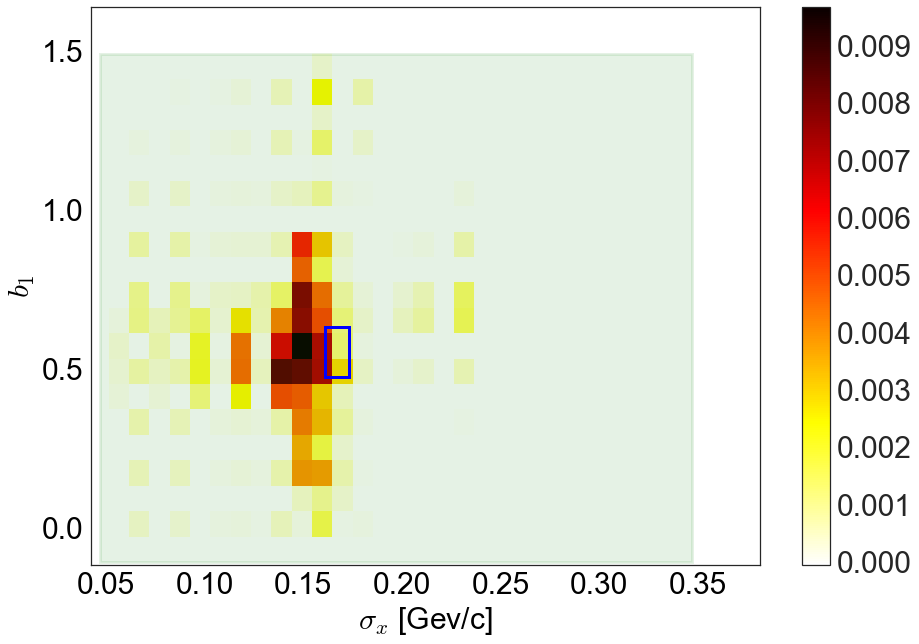

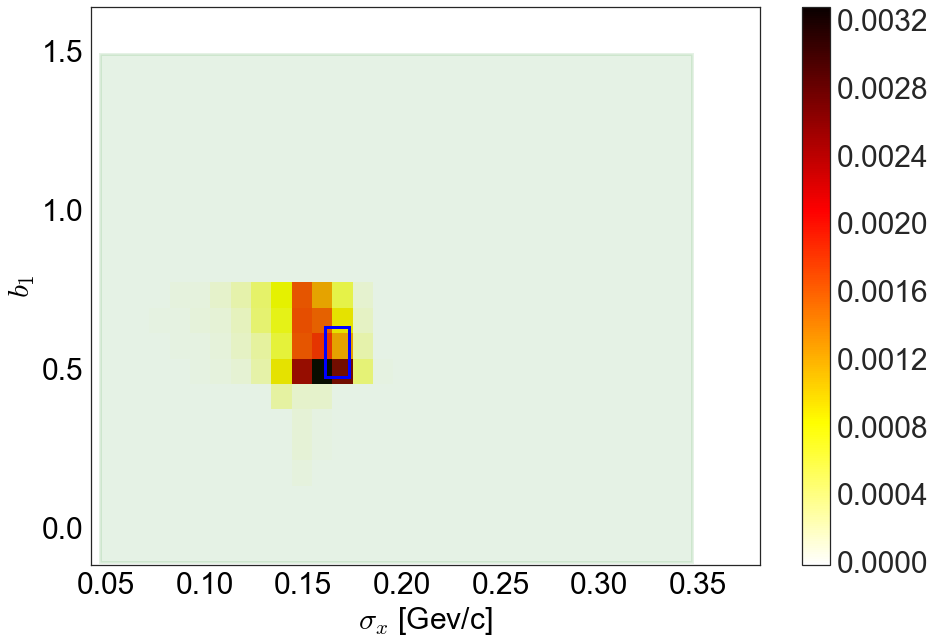

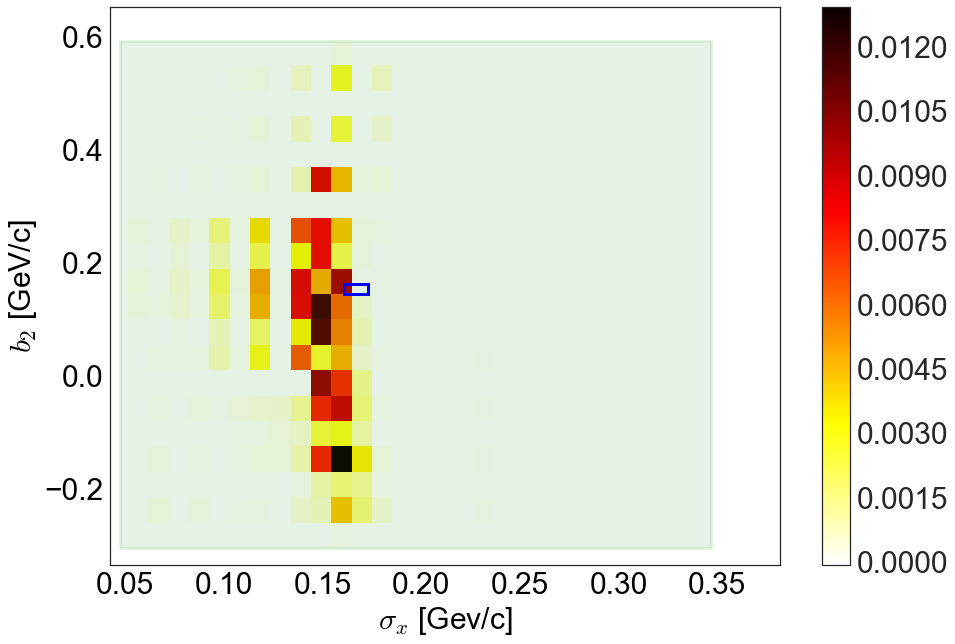

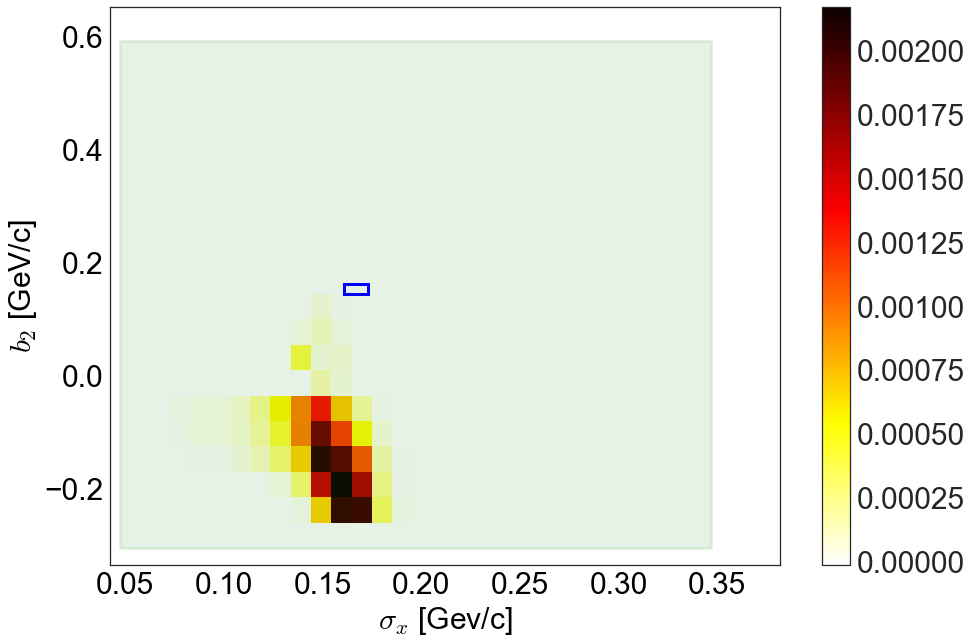

In [12]:
do_save_fig=False
do_add_nominal_values=True
target='C12'
do_draw = [False , True , False , False , True ]
binsx=np.linspace(0,0.36,36)#np.linspace(0.04,0.26,31)
binsy=20
plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$a_{1}$',
                                  nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
                                  nominal_v2=nominal_values['a1_%s'%target],nominal_v2_err=nominal_values['a1_err_%s'%target],
                                  do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
                                  do_draw=do_draw)
plot_SigmaT_correlationWithOthers(v2='SigmaZa2',ylabel='$a_{2}$ [GeV/c]',          
                                  nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
                                  nominal_v2=nominal_values['a2_%s'%target],nominal_v2_err=nominal_values['a2_err_%s'%target],
                                  do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
                                  do_draw=do_draw)
plot_SigmaT_correlationWithOthers(v2='MeanZa1',ylabel='$b_{1}$',
                                  nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
                                  nominal_v2=nominal_values['b1_%s'%target],nominal_v2_err=nominal_values['b1_err_%s'%target],
                                  do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
                                  do_draw=do_draw)
plot_SigmaT_correlationWithOthers(v2='MeanZa2',ylabel='$b_{2}$ [GeV/c]',
                                  nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
                                  nominal_v2=nominal_values['b2_%s'%target],nominal_v2_err=nominal_values['b2_err_%s'%target],
                                  do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
                                  do_draw=do_draw)

In [47]:
def draw_PvalWeighting(var='SigmaX', xlabel='',bins=50,target='12C',name='$^{12}C$',
                       PvalTotWeight=None,legend_loc='bbox',                       
                       x_range = None,                       
                       y_range = None,                       
                       xtext = None , ytext=None,                       
                       do_save_fig=False,
                       figsize=(10,10),                       
                       fontsize=20,
                       do_KSpt_weighting=False,
                       do_add_PvalTotal=False,
                       do_remove_PvalTotal_unweighted=False):
    weights=[np.ones(len(sims)),sims['Pval'+var+'_weighted_'+target]]
    weighting_labels = ['generated','weighted by $Pval(\\sigma_{x})$']
    
    if not do_remove_PvalTotal_unweighted:
        weights.append(sims['PvalTotal_unweighted_%s'%target])
        weighting_labels.append('weighted by $Pval(total)$')

    print target
    
    if target=='12C' : 
        if do_KSpt_weighting:
            weights.append(sims.KStPval)
            weighting_labels.append('$KS-p_t$ weighted')
            
    if do_add_PvalTotal:
        weights.append(sims['PvalTotal_%s'%target])
        weighting_labels.append('weighted by $Pval(tot)$')


        
    histograms , bins = plot_1d_withoutandwithweight(sims['gen'+var],
                                                     weights=weights,
                                                     weighting_labels = weighting_labels,
                                                     bins=bins,
                                                     legend_loc=legend_loc,
                                                     xlabel=xlabel,
                                                     ylabel='1k runs weighted [a.u.]',
                                                     x_range=x_range,                                                    
                                                     y_range=y_range,
                                                    figsize=figsize,
                                                    fontsize=fontsize);
    do_show_gaussians = [False , True , True , False]
    
    for hw,weight,weighting_label,do_show_gaussian in zip(histograms,weights,weighting_labels,do_show_gaussians):
        mu = np.average(sims['gen'+var] , weights=weight)
        variance = np.average((sims['gen'+var]-mu)**2, weights=weight)
        sigma = np.sqrt(variance)                                                                           
        print weighting_label + ': %.3f \pm %.3f'%(mu,sigma)
    
    plt.text(0.26,0.7*np.max(histograms),name,fontsize=40)
    if do_save_fig: 
        plt.tight_layout()
        plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/AcceptanceCorrection'+var+'_'+target+'.pdf')


12C
generated: 
 mean=0.155 , stdev=0.000
weighted by $Pval(\sigma_{x})$: 
 mean=0.155 , stdev=0.000
weighted by $Pval(total)$: 
 mean=0.155 , stdev=0.000
$KS-p_t$ weighted: 
 mean=0.155 , stdev=0.000
27Al
generated: 
 mean=0.155 , stdev=0.000
weighted by $Pval(\sigma_{x})$: 
 mean=0.155 , stdev=0.000
weighted by $Pval(total)$: 
 mean=0.155 , stdev=0.000
56Fe
generated: 
 mean=0.155 , stdev=0.000
weighted by $Pval(\sigma_{x})$: 
 mean=0.155 , stdev=0.000
weighted by $Pval(total)$: 
 mean=0.155 , stdev=0.000
208Pb
generated: 
 mean=0.155 , stdev=0.000
weighted by $Pval(\sigma_{x})$: 
 mean=0.155 , stdev=0.000
weighted by $Pval(total)$: 
 mean=0.155 , stdev=0.000


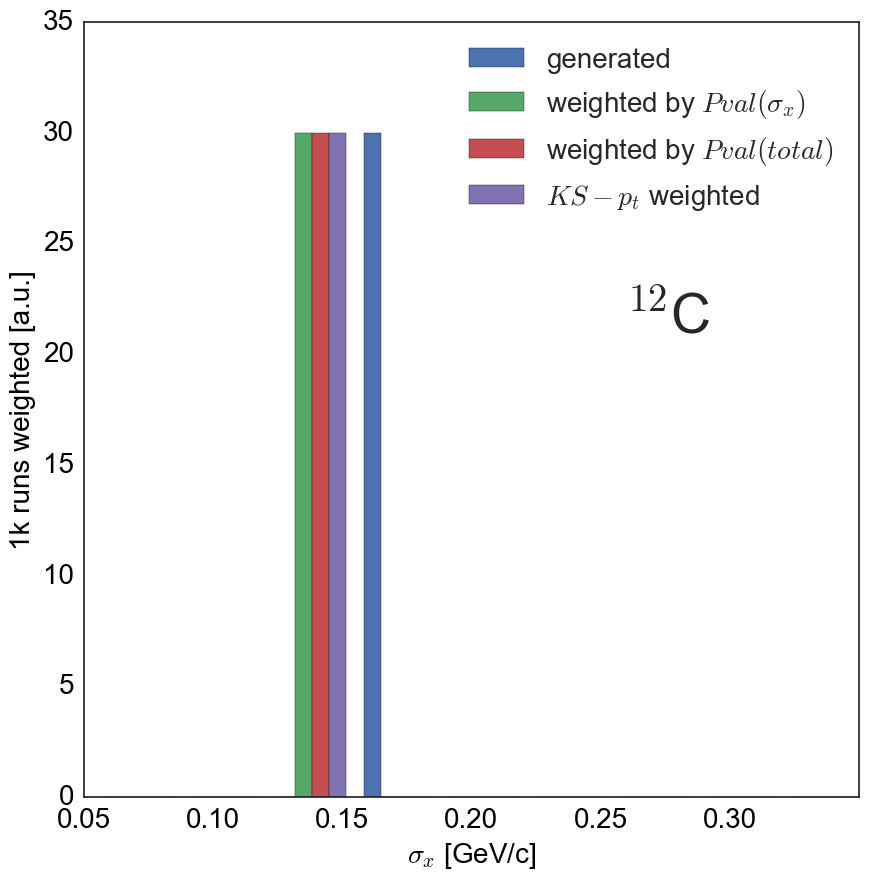

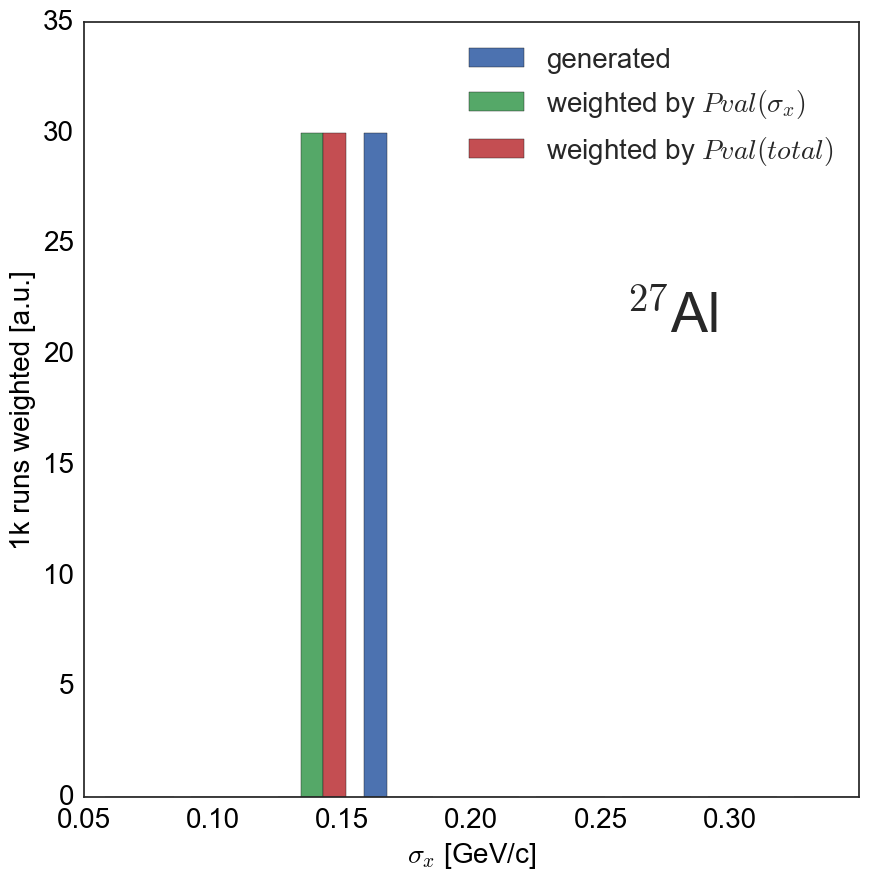

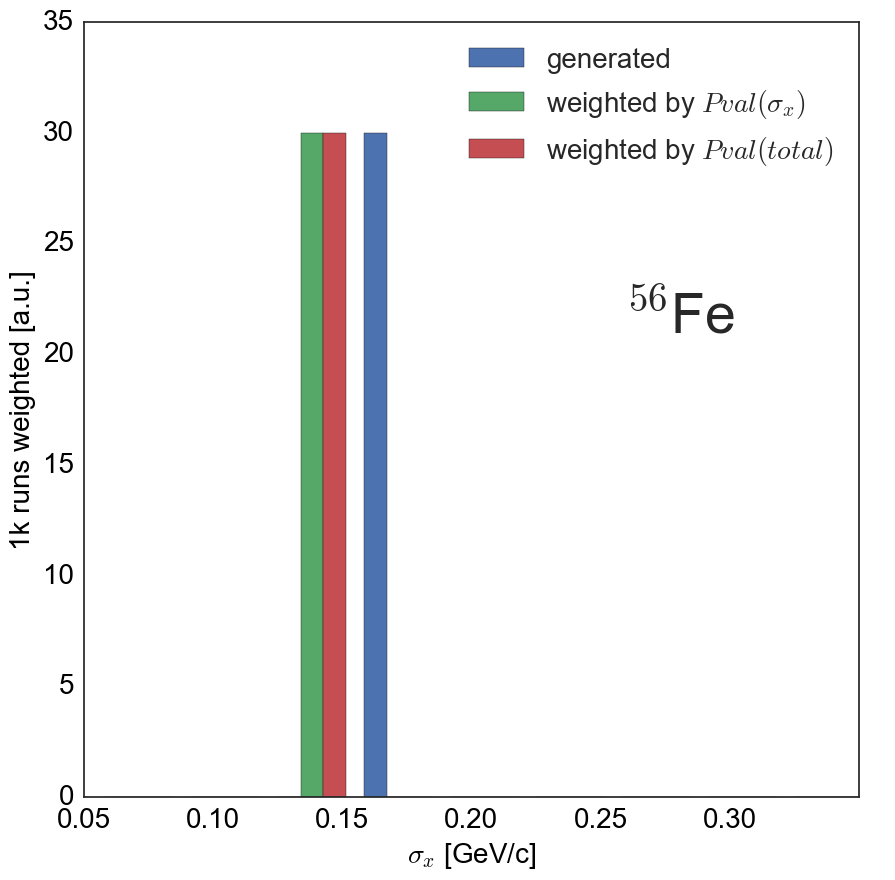

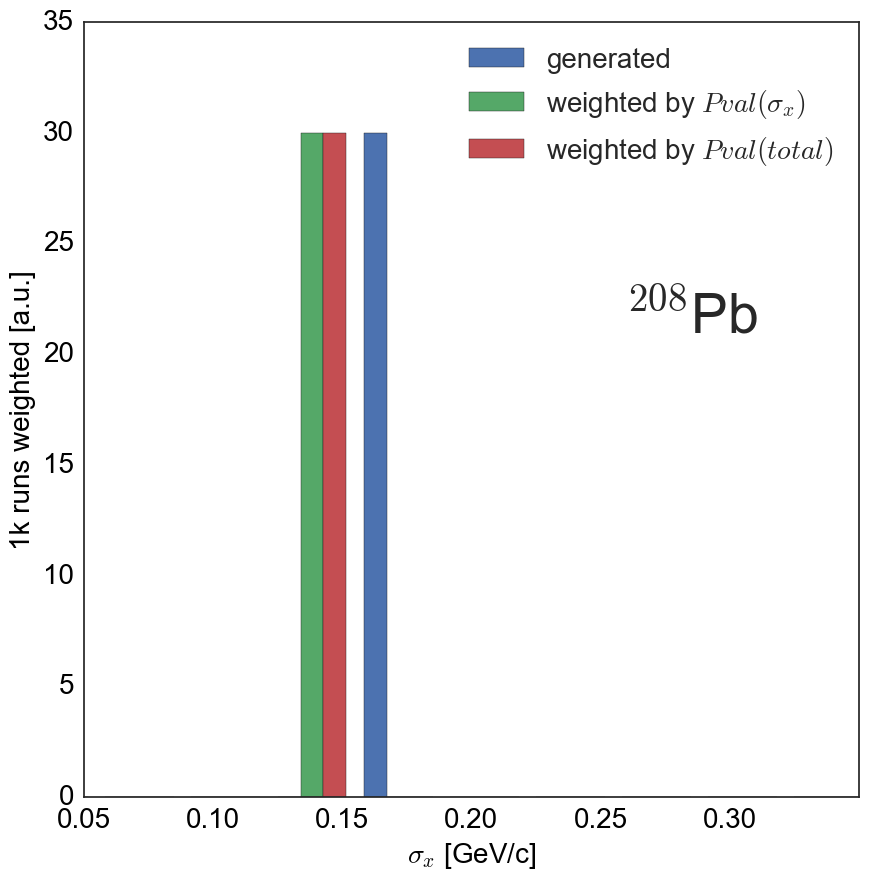

In [15]:
for target,name in zip(['12C','27Al','56Fe','208Pb'],['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']):
    draw_PvalWeighting(var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',bins=30,x_range=(0.05,0.35),
                       target=target,name=name,
                       legend_loc='upper right',do_save_fig=False)

12C
generated: 0.334 \pm 0.338
weighted by $Pval(\sigma_{x})$: 0.209 \pm 0.216
weighted by $Pval(tot)$: 0.200 \pm 0.095
27Al
generated: 0.334 \pm 0.338
weighted by $Pval(\sigma_{x})$: 0.204 \pm 0.215
weighted by $Pval(tot)$: 0.140 \pm 0.074
56Fe
generated: 0.334 \pm 0.338
weighted by $Pval(\sigma_{x})$: 0.302 \pm 0.215
weighted by $Pval(tot)$: 0.275 \pm 0.037
208Pb
generated: 0.334 \pm 0.338
weighted by $Pval(\sigma_{x})$: 0.152 \pm 0.201
weighted by $Pval(tot)$: 0.178 \pm 0.089


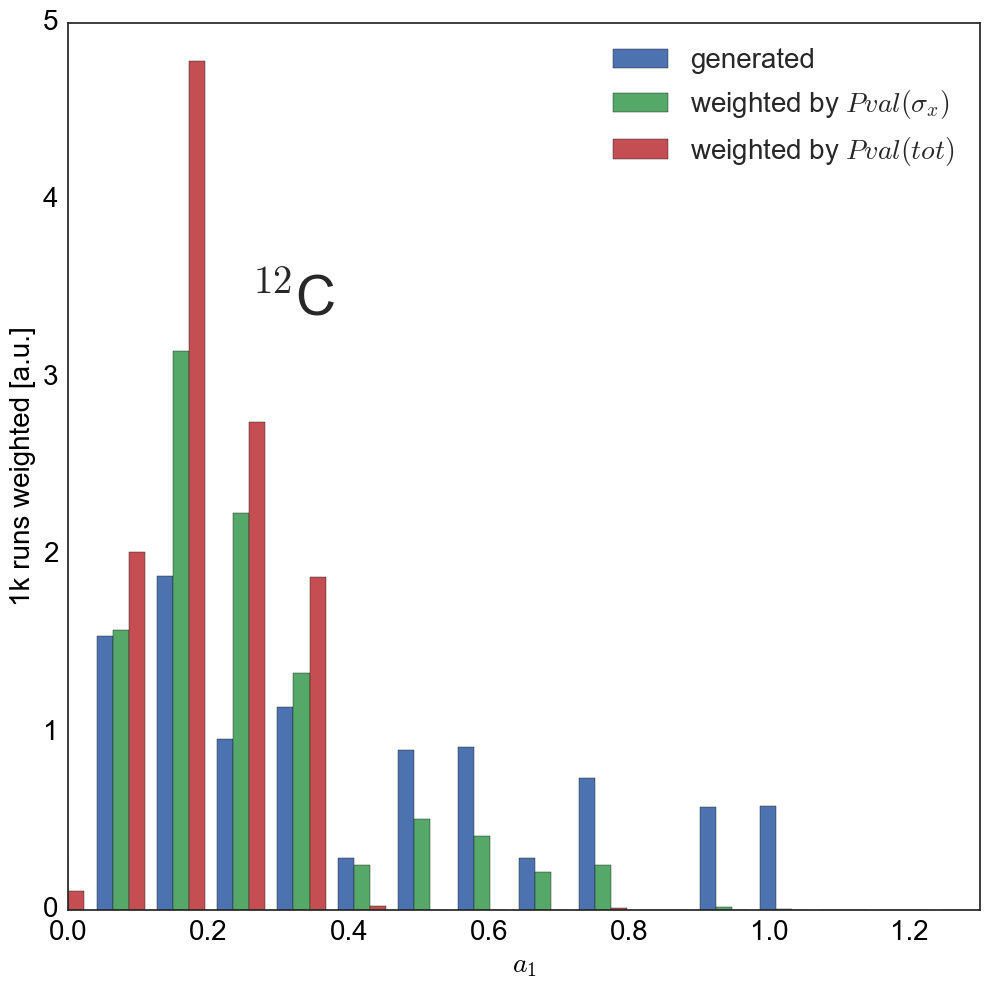

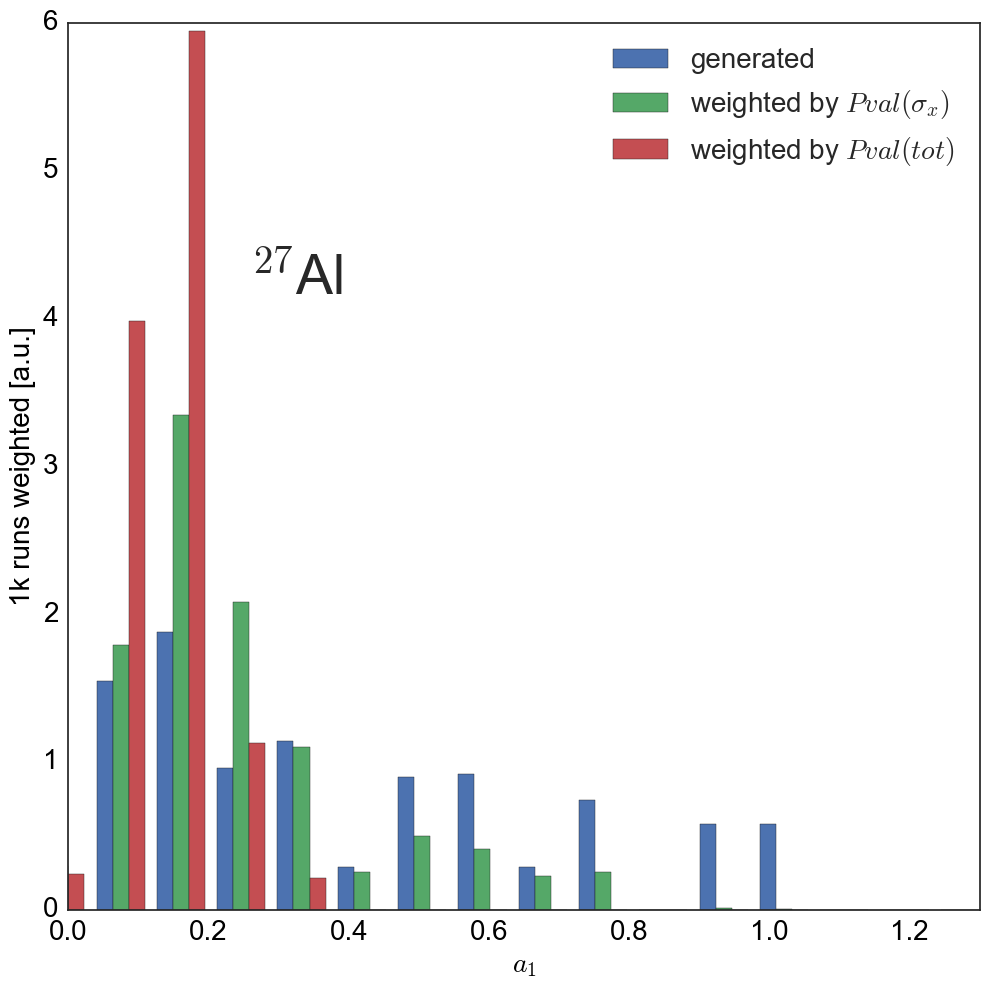

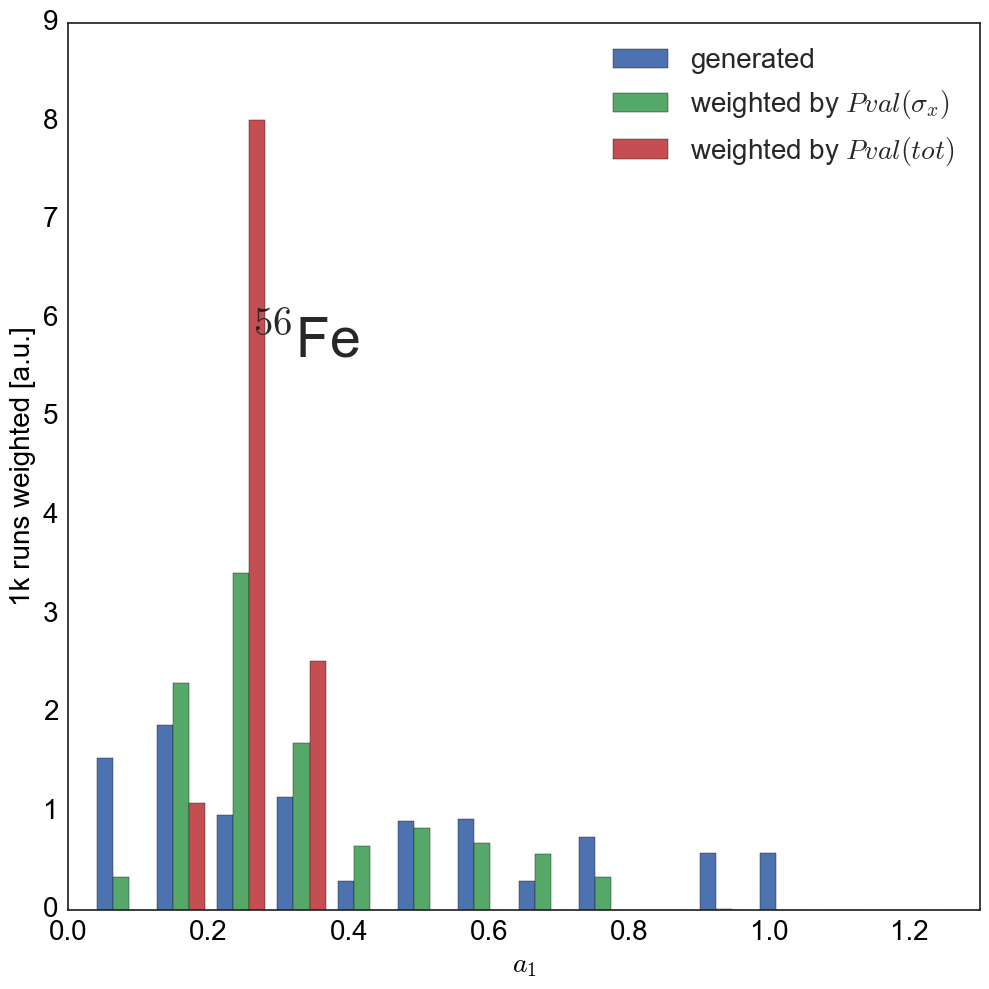

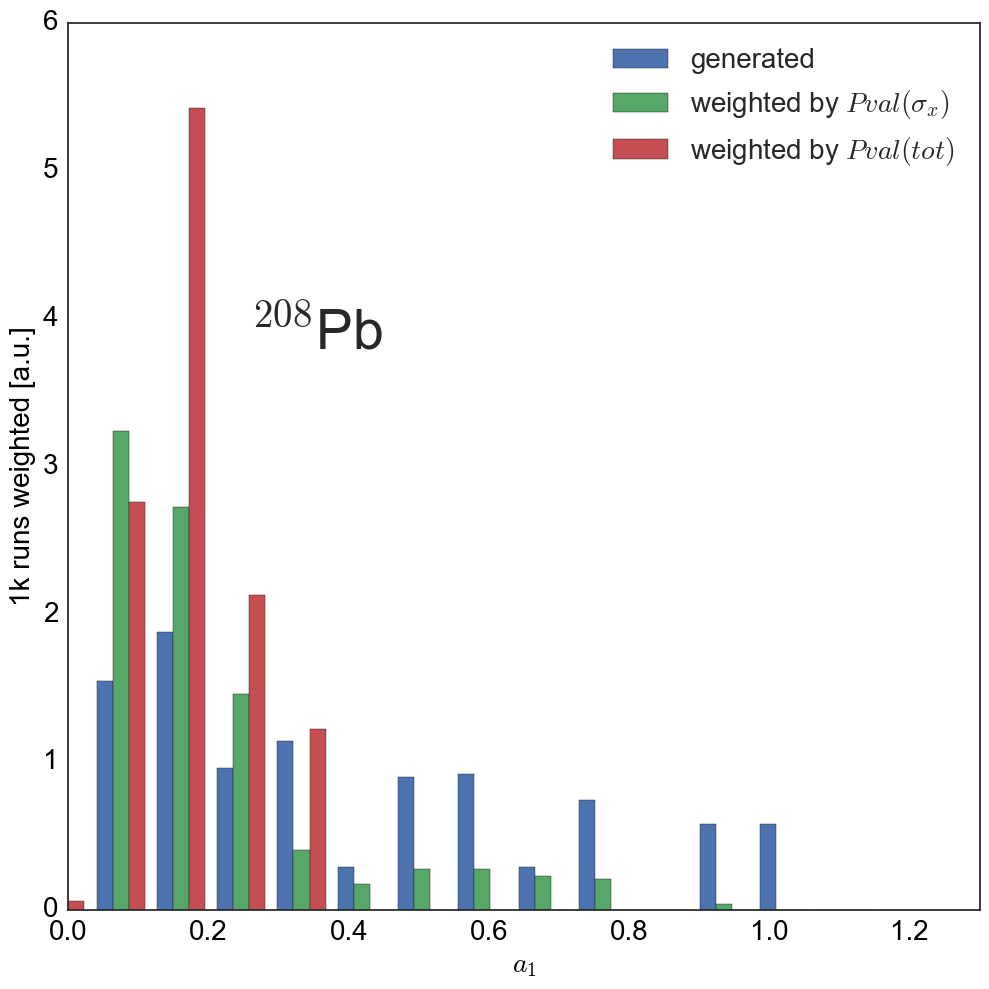

In [49]:
for target,name in zip(['12C','27Al','56Fe','208Pb'],['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']):
    draw_PvalWeighting(var='SigmaZa1',xlabel='$a_1$',bins=30,
                       x_range=(-0.0,1.3),
                       target=target,name=name,
                       legend_loc='upper right',
                       do_add_PvalTotal=True,
                       do_remove_PvalTotal_unweighted=True,
                       do_save_fig=True)

12C
generated: 0.011 \pm 0.238
weighted by $Pval(\sigma_{x})$: -0.022 \pm 0.166
weighted by $Pval(tot)$: 0.025 \pm 0.092
27Al
generated: 0.011 \pm 0.238
weighted by $Pval(\sigma_{x})$: -0.021 \pm 0.171
weighted by $Pval(tot)$: 0.044 \pm 0.111
56Fe
generated: 0.011 \pm 0.238
weighted by $Pval(\sigma_{x})$: -0.001 \pm 0.162
weighted by $Pval(tot)$: -0.021 \pm 0.085
208Pb
generated: 0.011 \pm 0.238
weighted by $Pval(\sigma_{x})$: -0.013 \pm 0.206
weighted by $Pval(tot)$: 0.027 \pm 0.100


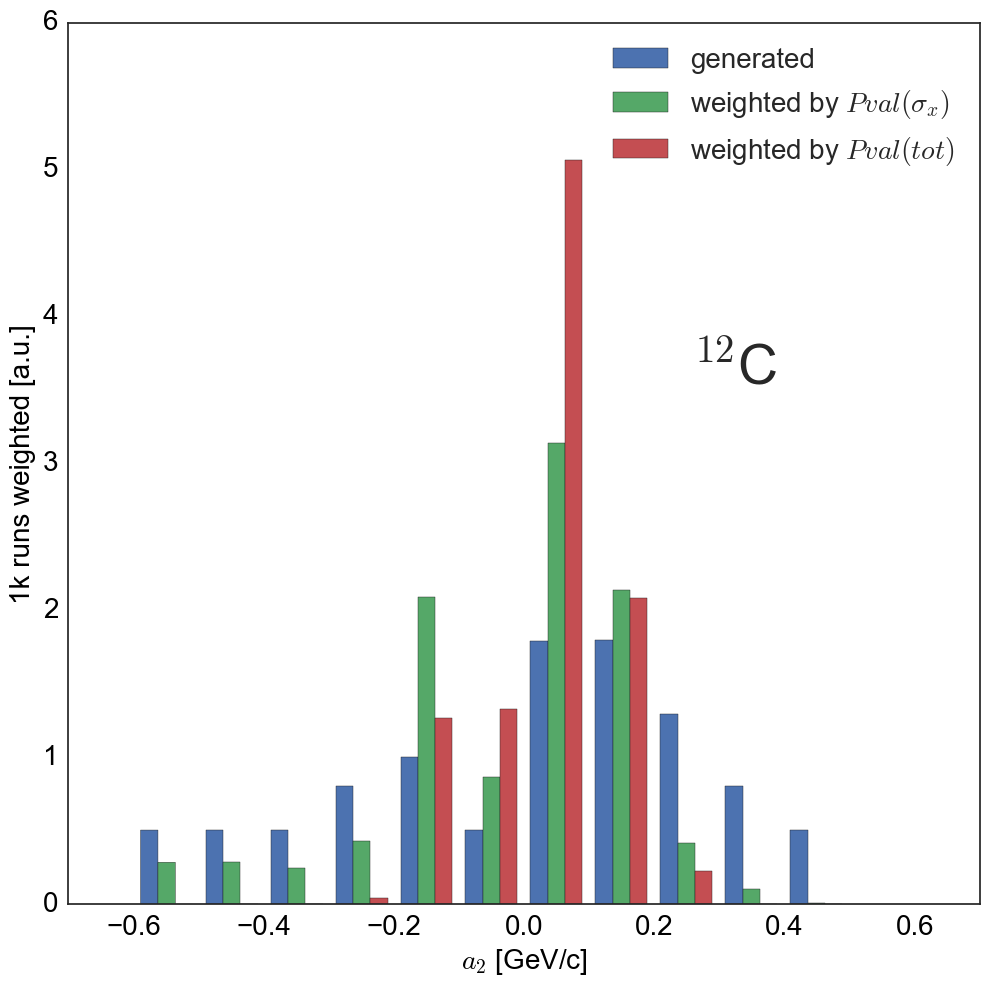

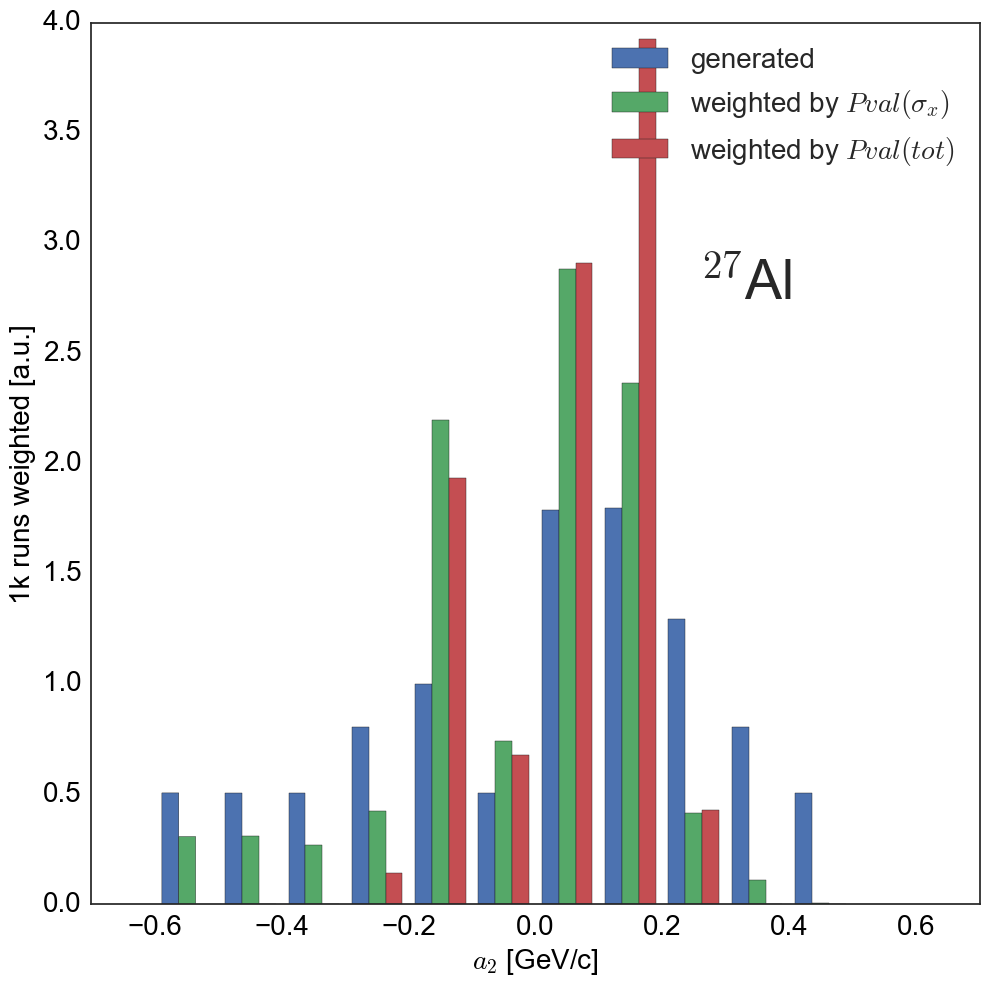

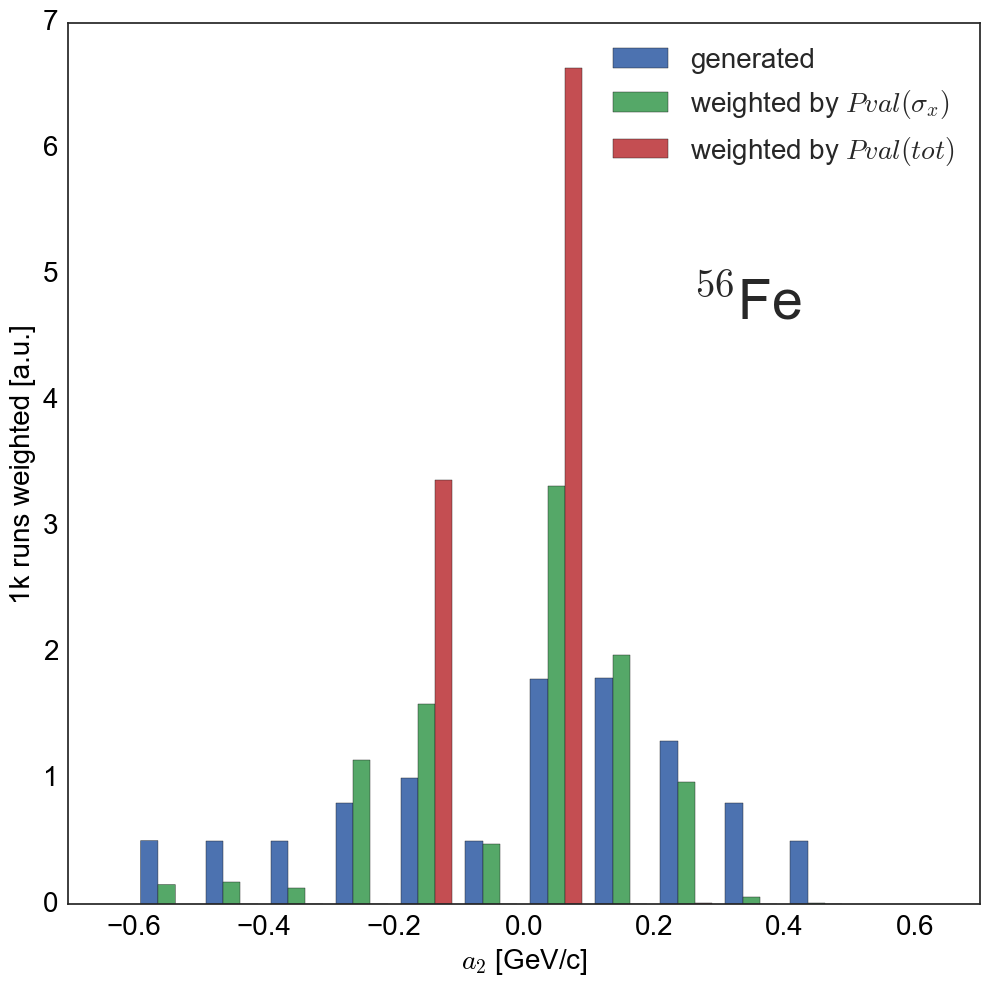

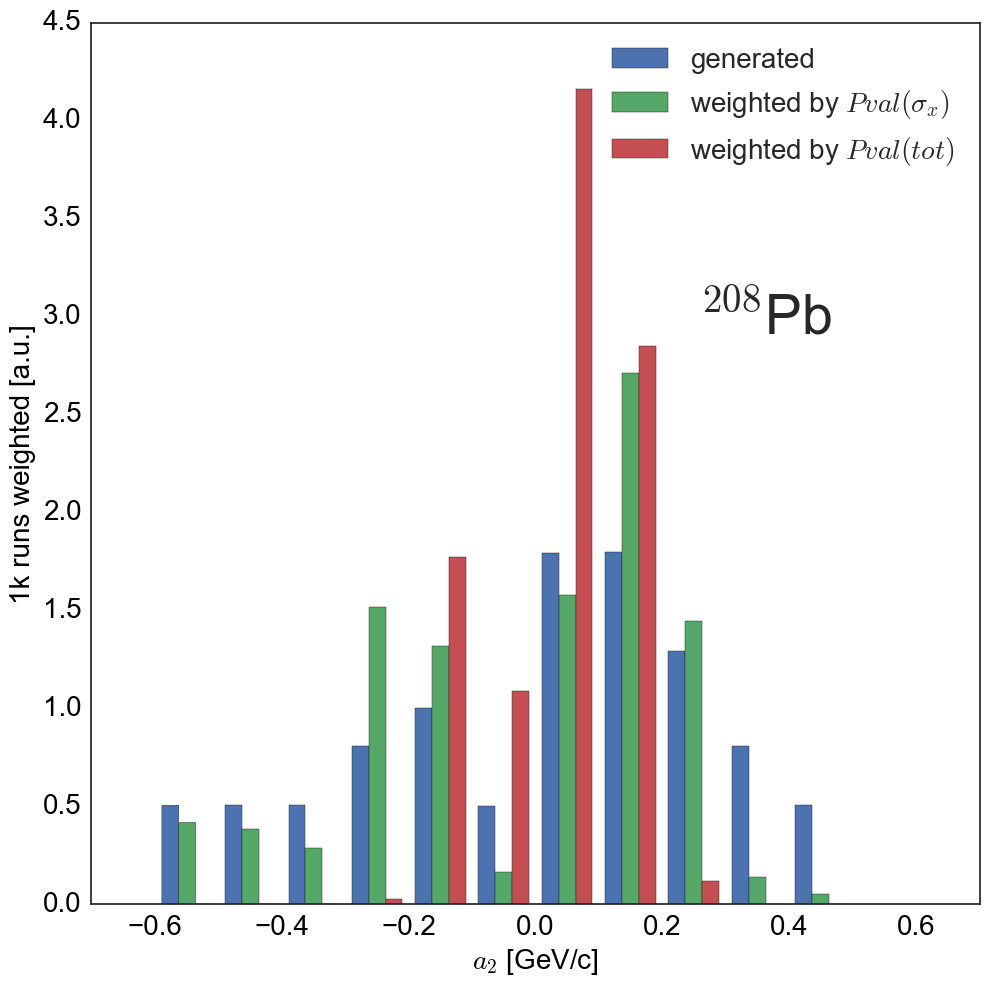

In [51]:
for target,name in zip(['12C','27Al','56Fe','208Pb'],['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']):
    draw_PvalWeighting(var='SigmaZa2',xlabel='$a_2$ [GeV/c]',bins=11,
                       x_range=(-0.7,0.7),
                       target=target,name=name,
                       legend_loc='upper right',
                       do_add_PvalTotal=True,
                       do_remove_PvalTotal_unweighted=True,
                       do_save_fig=True)

12C
generated: 0.618 \pm 0.340
weighted by $Pval(\sigma_{x})$: 0.572 \pm 0.179
weighted by $Pval(tot)$: 0.595 \pm 0.103
27Al
generated: 0.618 \pm 0.340
weighted by $Pval(\sigma_{x})$: 0.628 \pm 0.206
weighted by $Pval(tot)$: 0.590 \pm 0.121
56Fe
generated: 0.618 \pm 0.340
weighted by $Pval(\sigma_{x})$: 0.567 \pm 0.169
weighted by $Pval(tot)$: 0.611 \pm 0.085
208Pb
generated: 0.618 \pm 0.340
weighted by $Pval(\sigma_{x})$: 0.557 \pm 0.174
weighted by $Pval(tot)$: 0.612 \pm 0.094


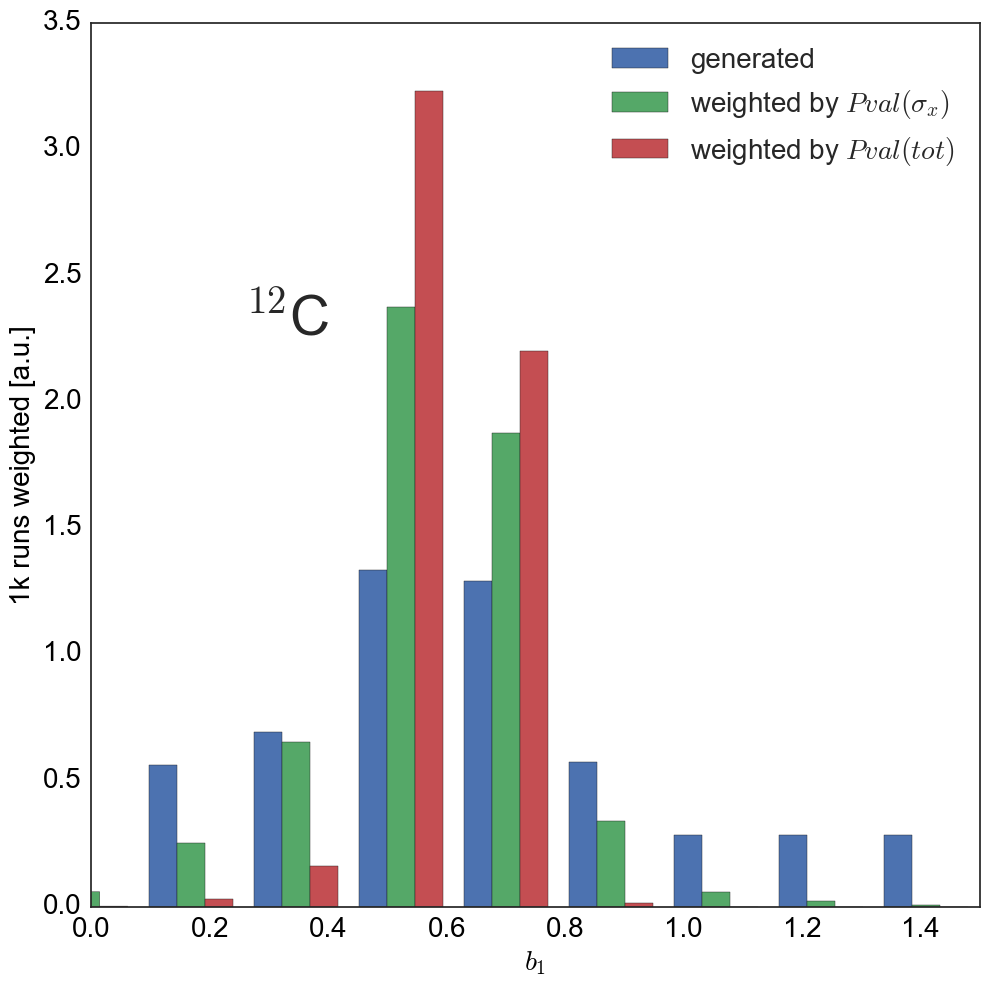

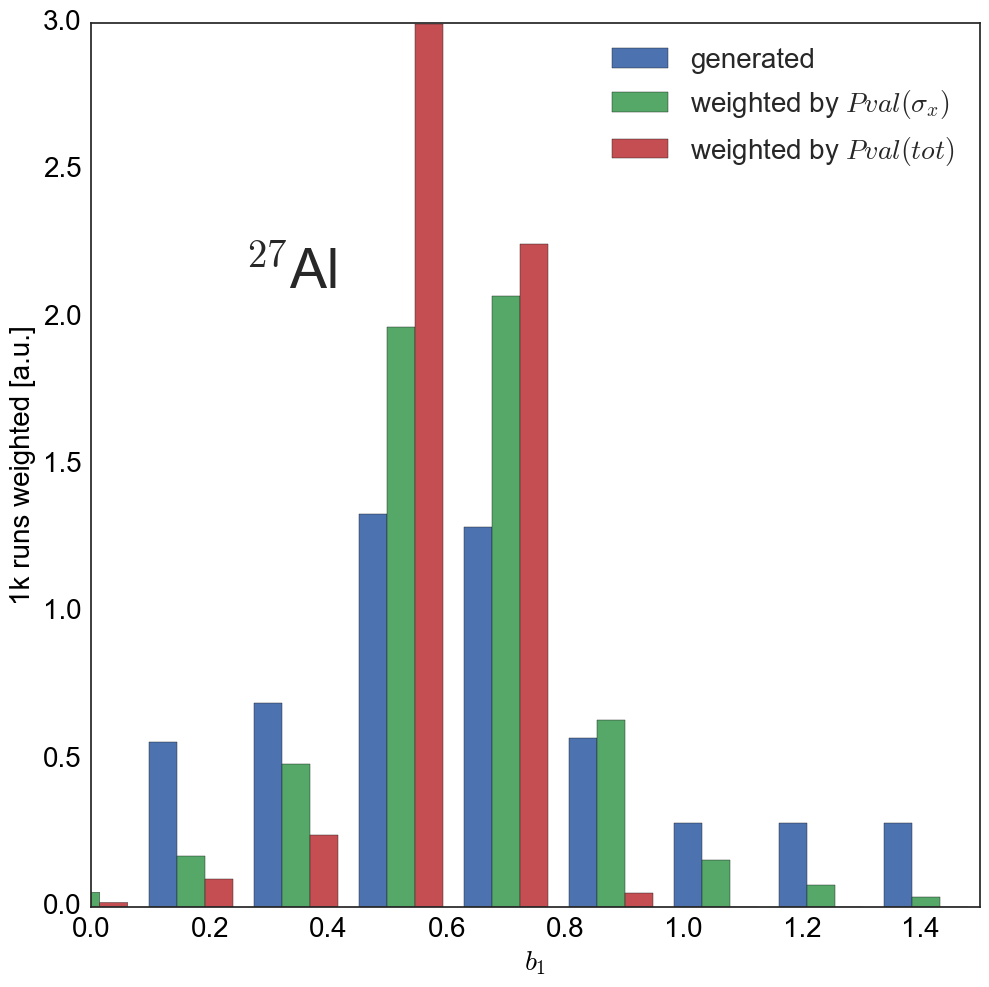

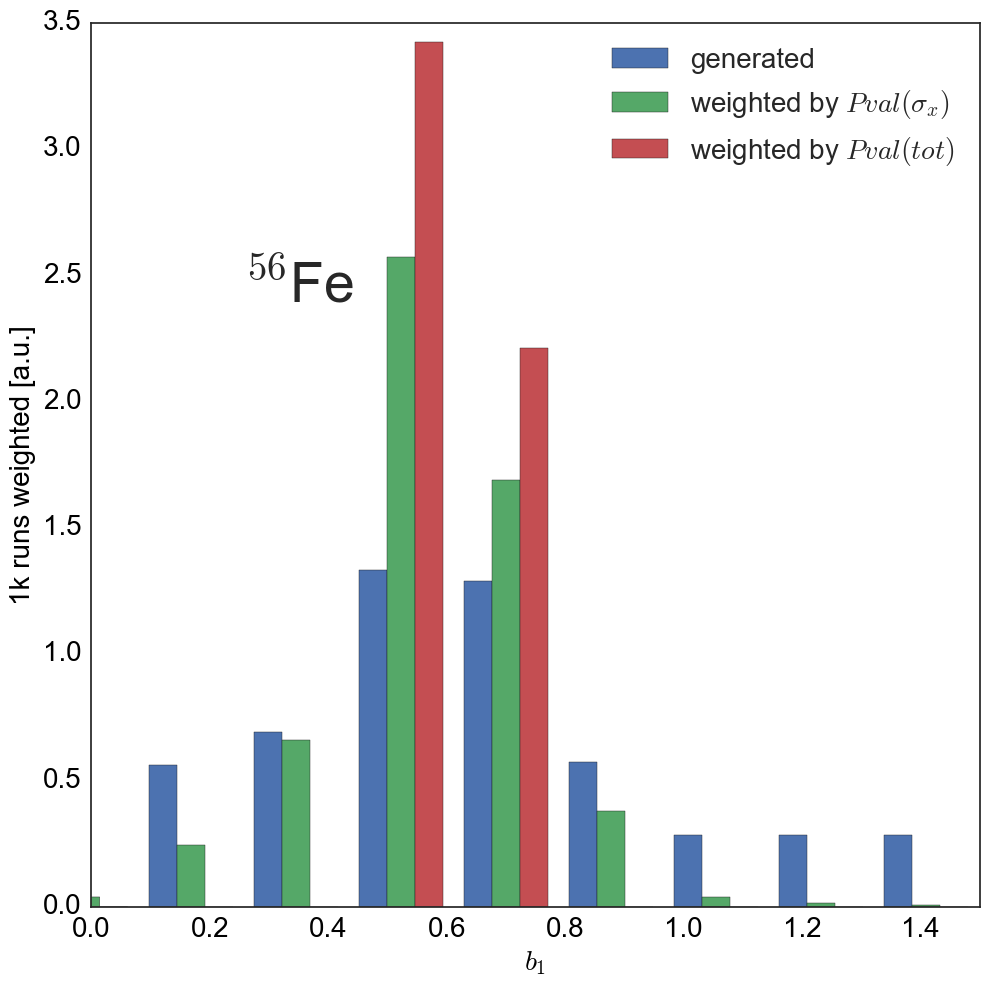

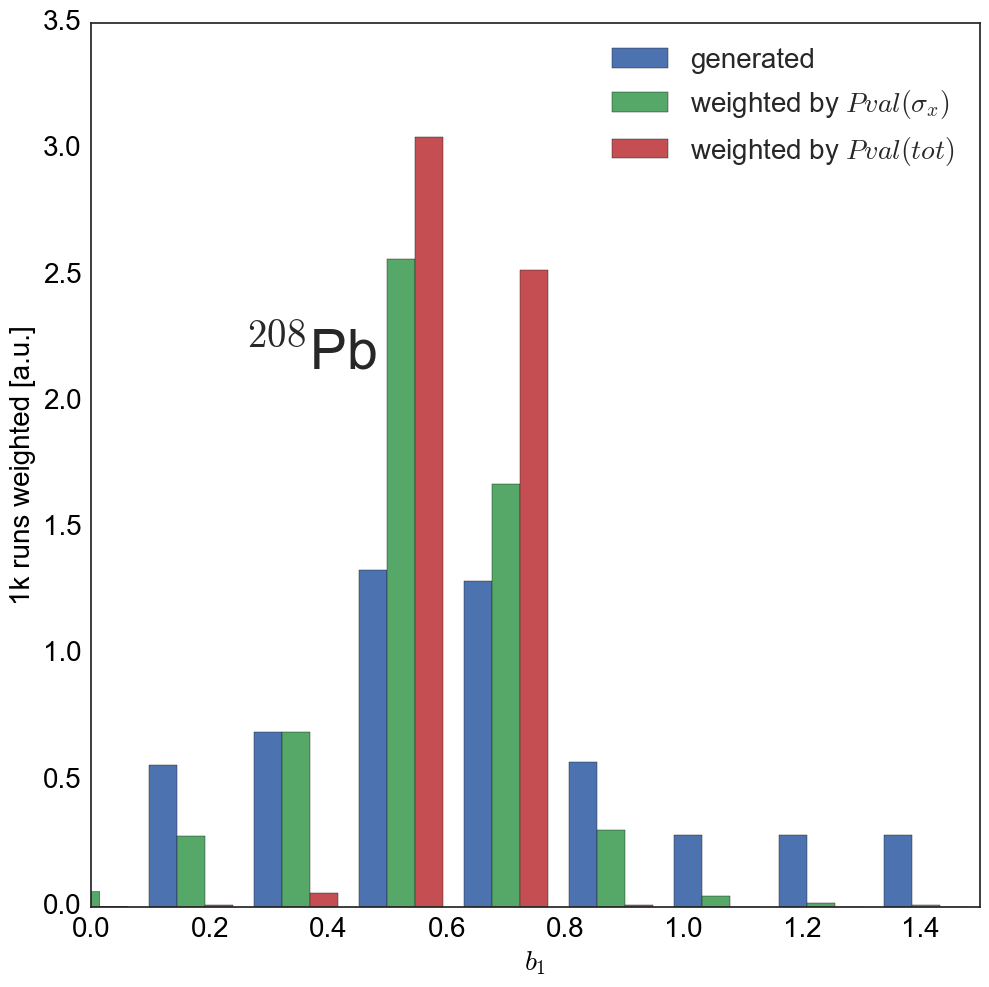

In [52]:
for target,name in zip(['12C','27Al','56Fe','208Pb'],['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']):
    draw_PvalWeighting(var='MeanZa1',xlabel='$b_1$',bins=9,
                       x_range=(0,1.5),
                       target=target,name=name,
                       legend_loc='upper right',
                       do_add_PvalTotal=True,
                       do_remove_PvalTotal_unweighted=True,
                       do_save_fig=True)

12C
generated: 0.097 \pm 0.226
weighted by $Pval(\sigma_{x})$: -0.040 \pm 0.177
weighted by $Pval(tot)$: -0.133 \pm 0.107
27Al
generated: 0.097 \pm 0.226
weighted by $Pval(\sigma_{x})$: -0.029 \pm 0.180
weighted by $Pval(tot)$: -0.103 \pm 0.127
56Fe
generated: 0.097 \pm 0.226
weighted by $Pval(\sigma_{x})$: 0.058 \pm 0.180
weighted by $Pval(tot)$: -0.117 \pm 0.054
208Pb
generated: 0.097 \pm 0.226
weighted by $Pval(\sigma_{x})$: 0.024 \pm 0.182
weighted by $Pval(tot)$: -0.127 \pm 0.095


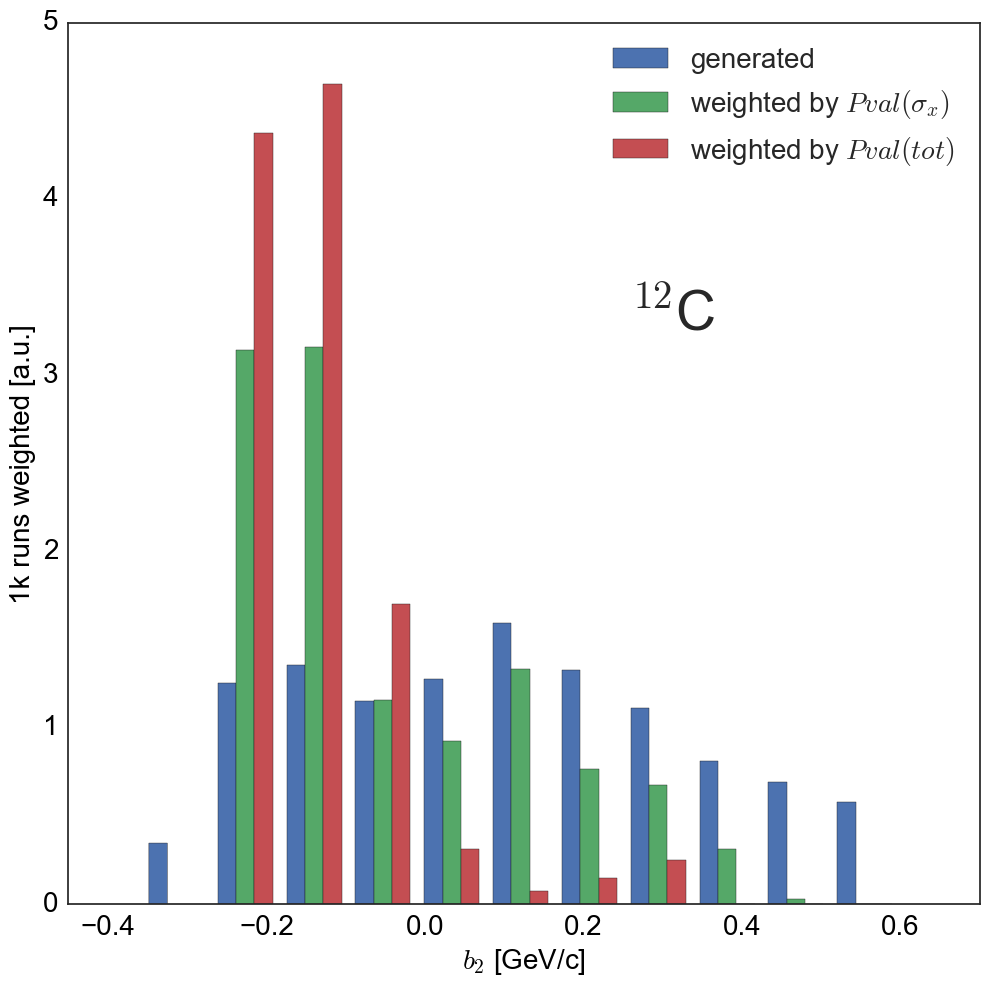

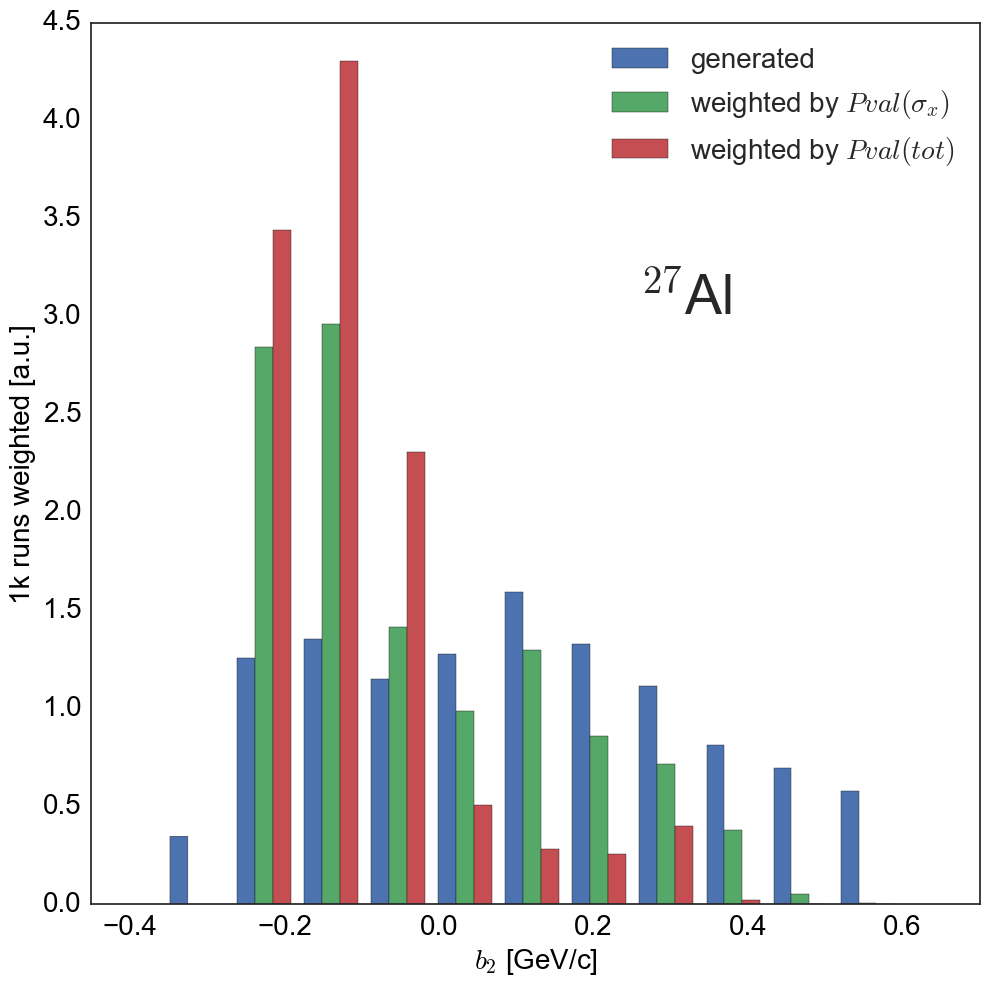

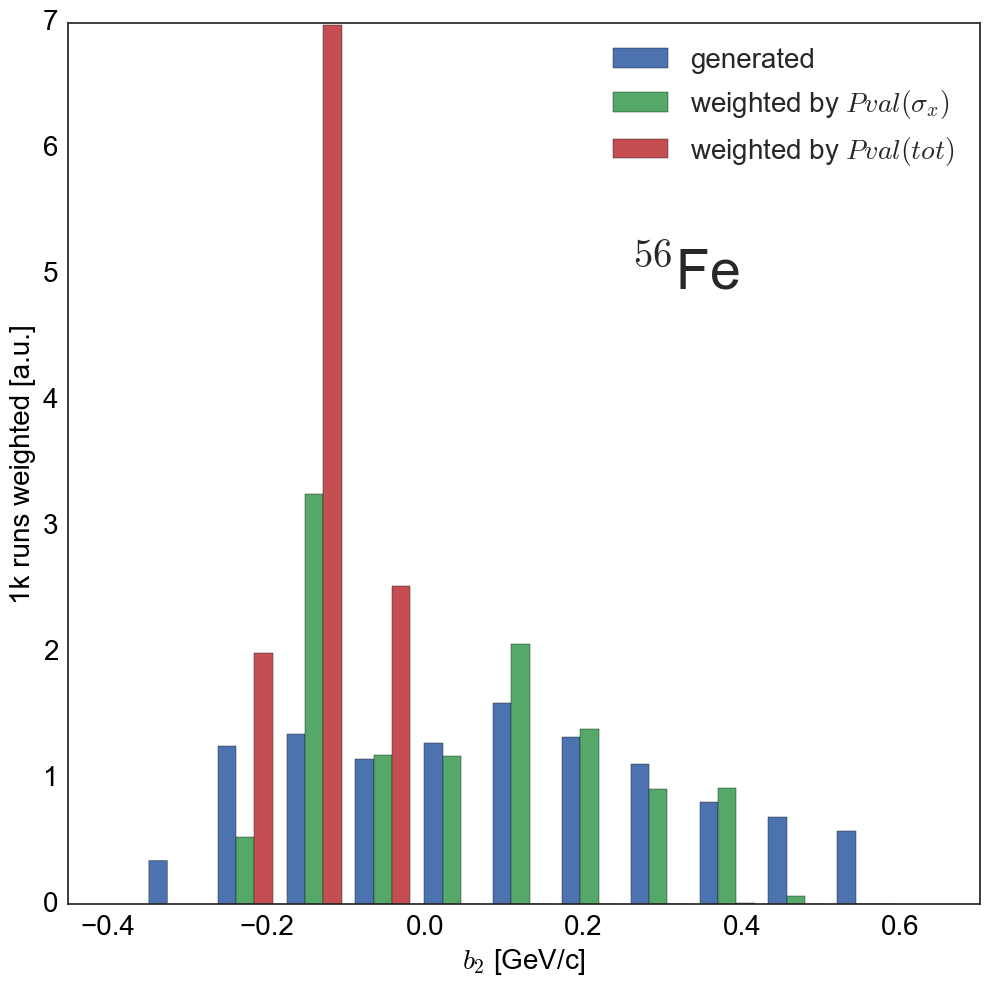

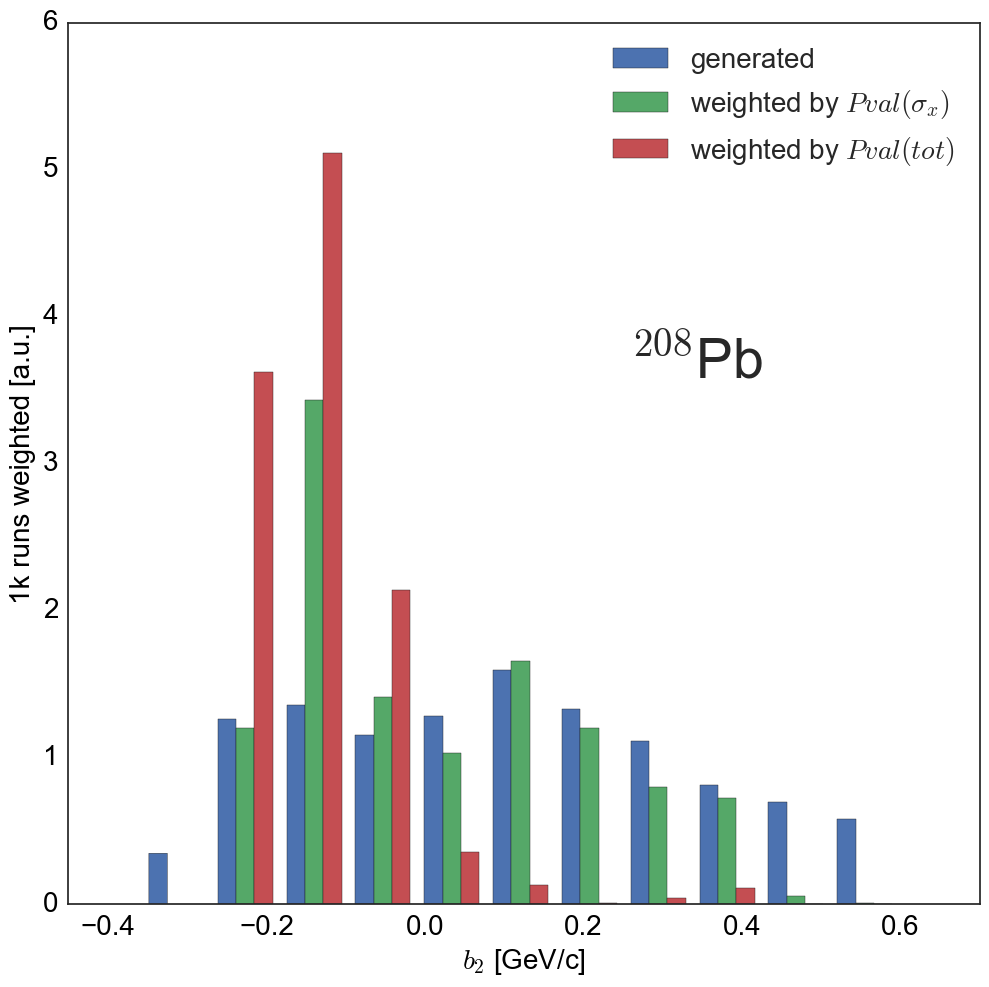

In [53]:
for target,name in zip(['12C','27Al','56Fe','208Pb'],['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']):
    draw_PvalWeighting(var='MeanZa2',xlabel='$b_2$ [GeV/c]',bins=11,
                       x_range=(-0.45,0.7),
                       target=target,name=name,
                       legend_loc='upper right',
                       do_add_PvalTotal=True,
                       do_remove_PvalTotal_unweighted=True,
                       do_save_fig=True)

fraction of zeros: 50.5743259 %
fraction of global Pval zeros: 87.5403927003 %


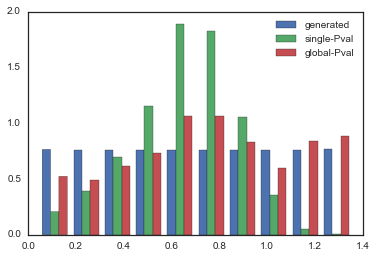

In [16]:
var='MeanZa1'
# print 'single Pval:',sims['Pval'+var+'_unweighted_12C']
print 'fraction of zeros:',100.*float(len(sims[sims['Pval'+var+'_unweighted_12C']<1e-5]))/len(sims),'%'
# print 'global Pval:',sims.PvalTotal_unweighted_12C
# print sims.PvalTotal_tw_12C
print 'fraction of global Pval zeros:',100.*float(len(sims[sims.PvalTotal_unweighted_12C<1e-4]))/len(sims),'%'                            
plt.hist([sims['gen'+var],sims['gen'+var],sims['gen'+var]] ,
         weights=[np.ones(len(sims)),sims['Pval'+var+'_unweighted_12C'],sims.PvalTotal_unweighted_12C]
        ,label=['generated','single-Pval','global-Pval'],normed=1);
plt.legend(loc='best')

ploting histogram weighted by PvalSigmaTSigmaZa1_12C
sum_weights: 93749.378149
ploting histogram weighted by PvalTotal
sum_weights: 97823.979889


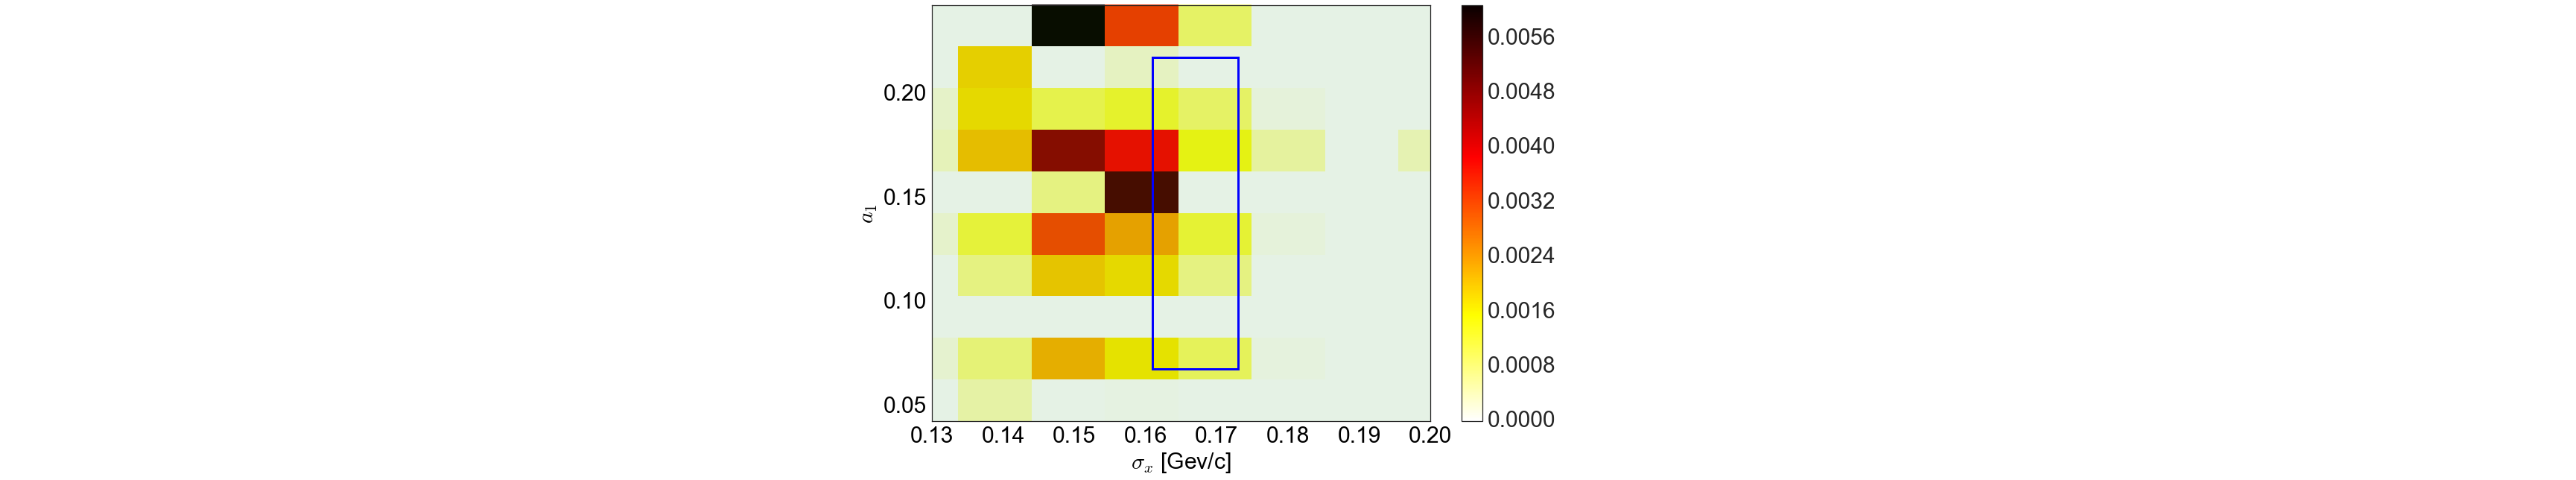

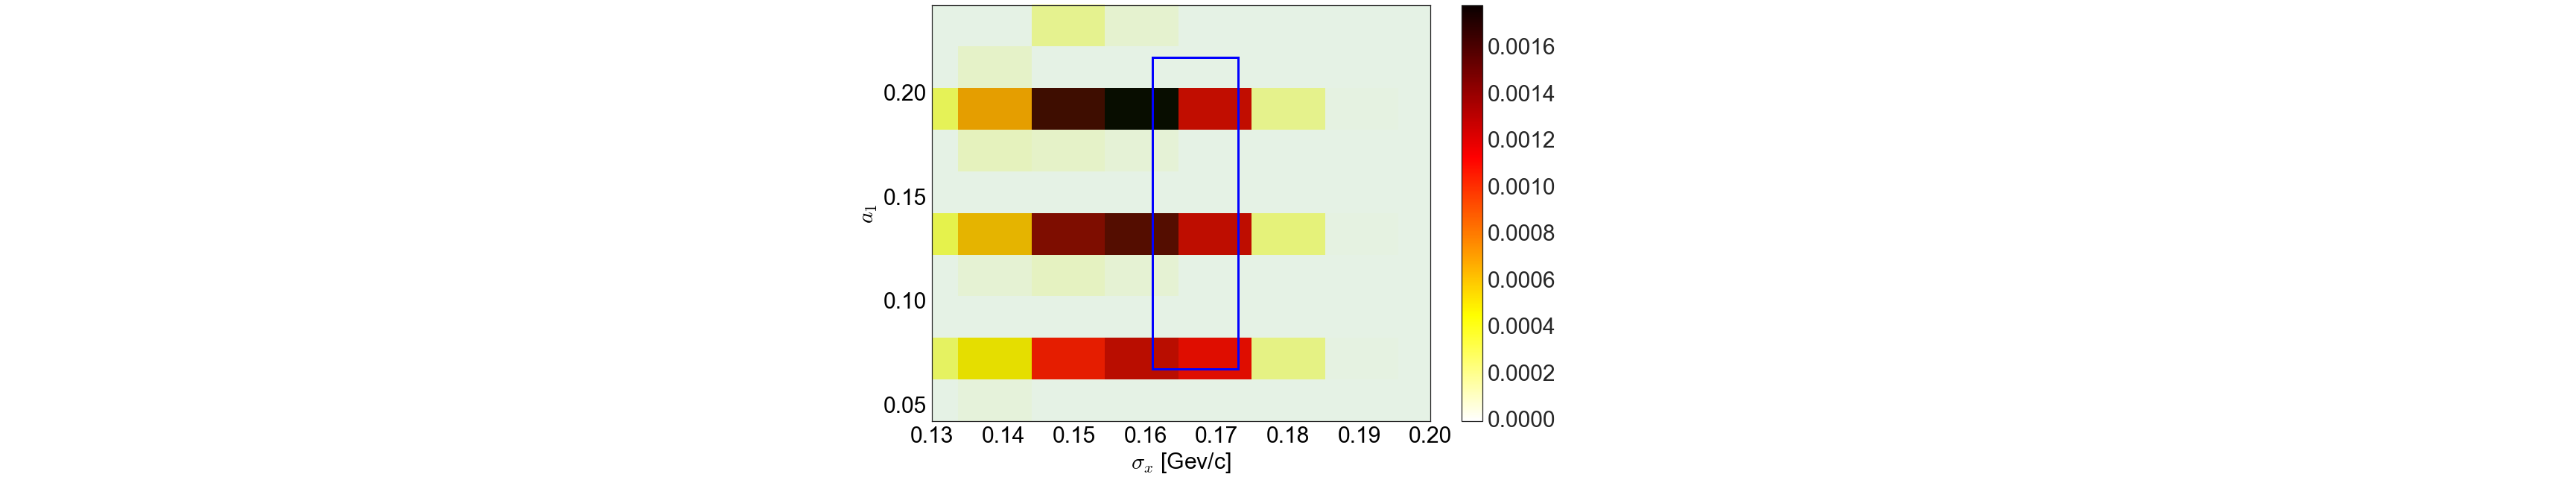

In [21]:
do_save_fig=False
do_add_nominal_values=True
target='C12'
do_draw = [False , True , False , False , True ]
binsx=np.linspace(0,0.36,36)#np.linspace(0.04,0.26,31)
ymin,ymax = nominal_values['a1_%s'%target]-0.1,nominal_values['a1_%s'%target]+0.1
binsy=np.linspace(ymin,ymax,11)
plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$a_{1}$',
                                  nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
                                  nominal_v2=nominal_values['a1_%s'%target],nominal_v2_err=nominal_values['a1_err_%s'%target],
                                  do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
                                  do_draw=do_draw,
                                  suffix='zoom',x_ranges=(0.13,0.2),y_ranges=(ymin,ymax))
# plot_SigmaT_correlationWithOthers(v2='SigmaZa2',ylabel='$a_{2}$ [GeV/c]',          
#                                   nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
#                                   nominal_v2=nominal_values['a2_%s'%target],nominal_v2_err=nominal_values['a2_err_%s'%target],
#                                   do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
#                                   do_draw=do_draw)
# plot_SigmaT_correlationWithOthers(v2='MeanZa1',ylabel='$b_{1}$',
#                                   nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
#                                   nominal_v2=nominal_values['b1_%s'%target],nominal_v2_err=nominal_values['b1_err_%s'%target],
#                                   do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
#                                   do_draw=do_draw)
# plot_SigmaT_correlationWithOthers(v2='MeanZa2',ylabel='$b_{2}$ [GeV/c]',
#                                   nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
#                                   nominal_v2=nominal_values['b2_%s'%target],nominal_v2_err=nominal_values['b2_err_%s'%target],
#                                   do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
#                                   do_draw=do_draw)

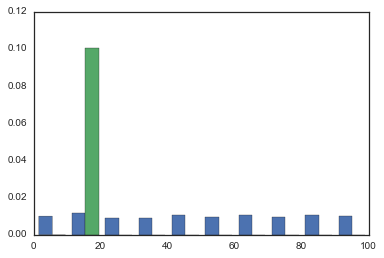

In [87]:
x = [random.uniform(0,100) for i in xrange(1000)]
dx = [random.uniform(0,0.01) for i in xrange(1000)]
sigma=0.1
y = [random.gauss(20,sigma) for i in xrange(1000)]
dy = [random.gauss(0.,0.) for i in xrange(1000)]
Pval = [Pval2varsAssumeGausDist(v1,v1Err,v2,v2Err) for v1,v1Err,v2,v2Err in zip(x,dx,y,dy)]

plt.hist([x,x],weights=[np.ones(len(x)),Pval],normed=1);

# generated-reconstructed

In [8]:
# read all our runs results
sims_files = []
sims_list , sims_files = os.listdir('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/') , [] 
for file in sims_list:                                                                                        
    print 'adding ',file
    sims_files.append(pd.read_csv(('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/'+file)))

sims_all=pd.concat(sims_files)  
print 'len:',len(sims_all) 

adding  runs1000000to1100000_20SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv
adding  runs1100000to1400000_30SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv
adding  runs600000to6018605_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv
len: 423786


In [14]:
def plot_parameter_generated_reconstructed(par='SigmaX',par_name='sigma_t',par_label='$\\sigma_t$',
                                           units='[GeV/c]',
                                           bins=np.linspace(0.05,0.35,30), do_save_plots=False,
                                           bins_diff=np.linspace(-0.05,0.15,40)):
    fig,ax=plt.subplots(figsize=(20,10))

    plt.hist2d(sims_all['gen'+par],sims_all['rec'+par+'_unweighted'],
               bins=(bins,bins),cmap='hot_r');
    cb=plt.colorbar()
    cb.ax.tick_params(labelsize=30)
    set_axes( ax , 'generated %s %s'%(par_label,units) , 'reconstructed %s %s'%(par_label,units) , fontsize=30)
    if do_save_plots: fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/Appendix_D/figures/generated_vs_reconstructed_%s.pdf'%par_name)


    fig,ax=plt.subplots(figsize=(20,10))
    plt.hist2d(sims_all['gen'+par],sims_all['rec'+par+'_unweighted'],
               weights=sims_all.PvalTotal_unweighted_12C,bins=(bins,bins),cmap='hot_r');
    cb=plt.colorbar()
    cb.ax.tick_params(labelsize=30)
    set_axes( ax , 'generated %s %s'%(par_label,units) , 'reconstructed %s %s'%(par_label,units) , fontsize=30)
    if do_save_plots: fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/Appendix_D/figures/generated_vs_reconstructed_%s_weighted.pdf'%par_name)


    fig,ax=plt.subplots(figsize=(20,10))
    x = sims_all['rec'+par+'_unweighted'] - sims_all['gen'+par]
    plt.hist([x,x],weights=[np.ones(len(x)),sims_all.PvalTotal_unweighted_12C],
             label=['non-weighted','weighted by $Pval(tot)$'],normed=1,
             bins=bins_diff)
    plt.legend(fontsize=25)
    ax.set_xlim(bins_diff.min(),bins_diff.max())
    set_axes( ax , '%s(reconstructed)-%s(generated) %s'%(par_label,par_label,units) , '' , fontsize=30)
    if do_save_plots: fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/Appendix_D/figures/gen_rec_%s.pdf'%par_name)

NameError: global name 'sims_all' is not defined

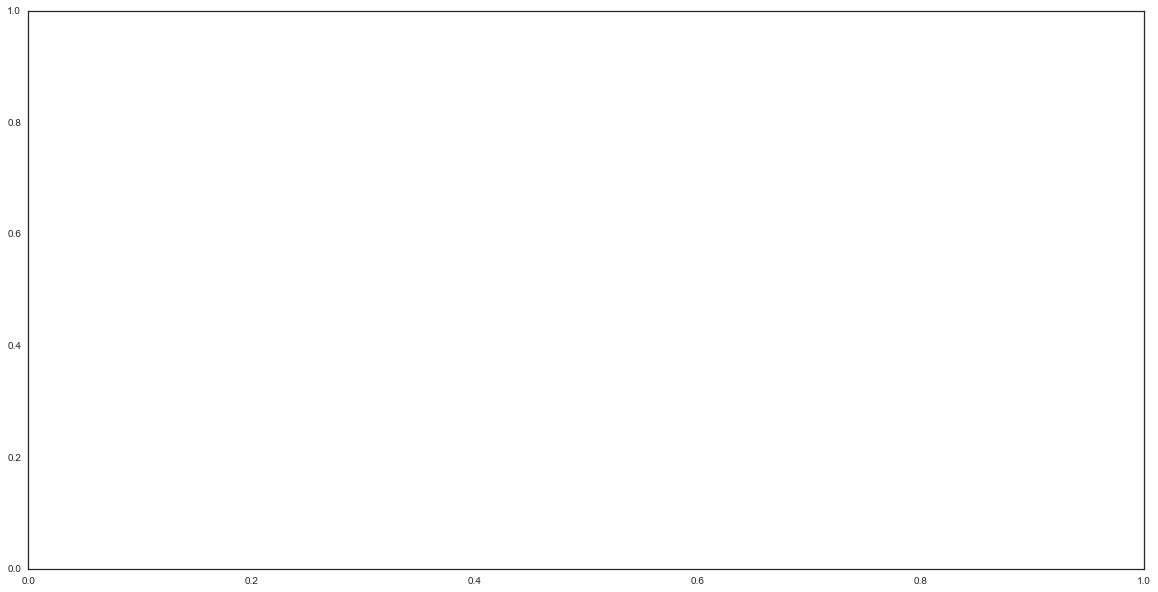

In [16]:
plot_parameter_generated_reconstructed(bins=np.linspace(0.05,0.35,30),bins_diff=np.linspace(-0.05,0.15,40),
                                      do_save_plots=False)

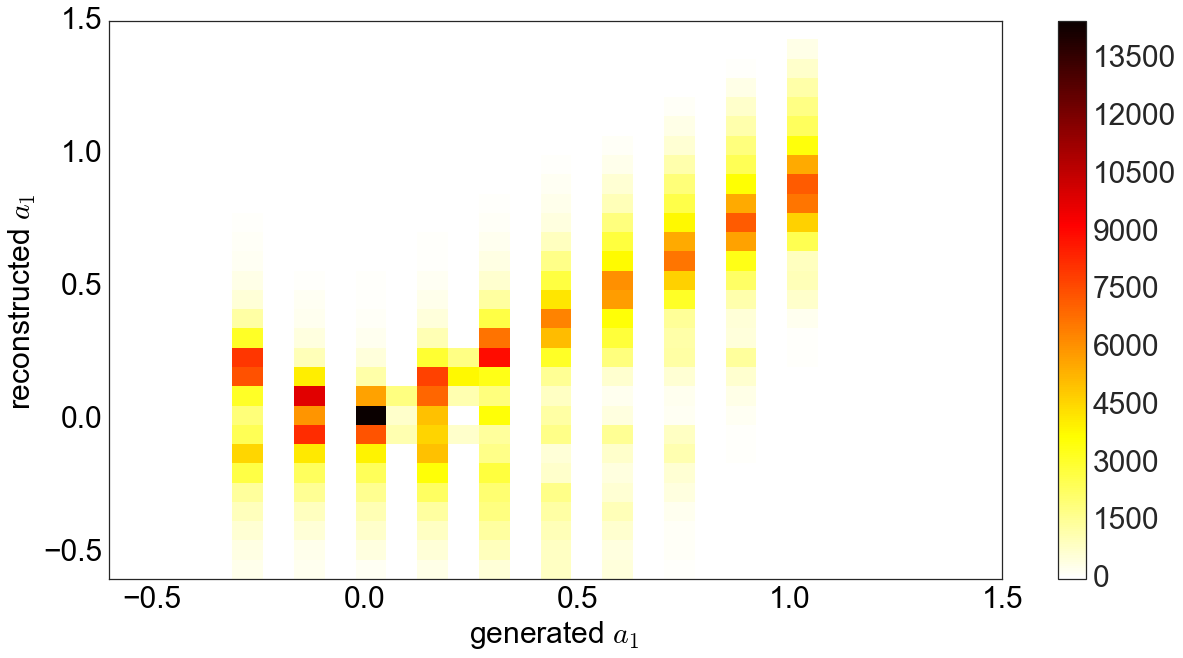

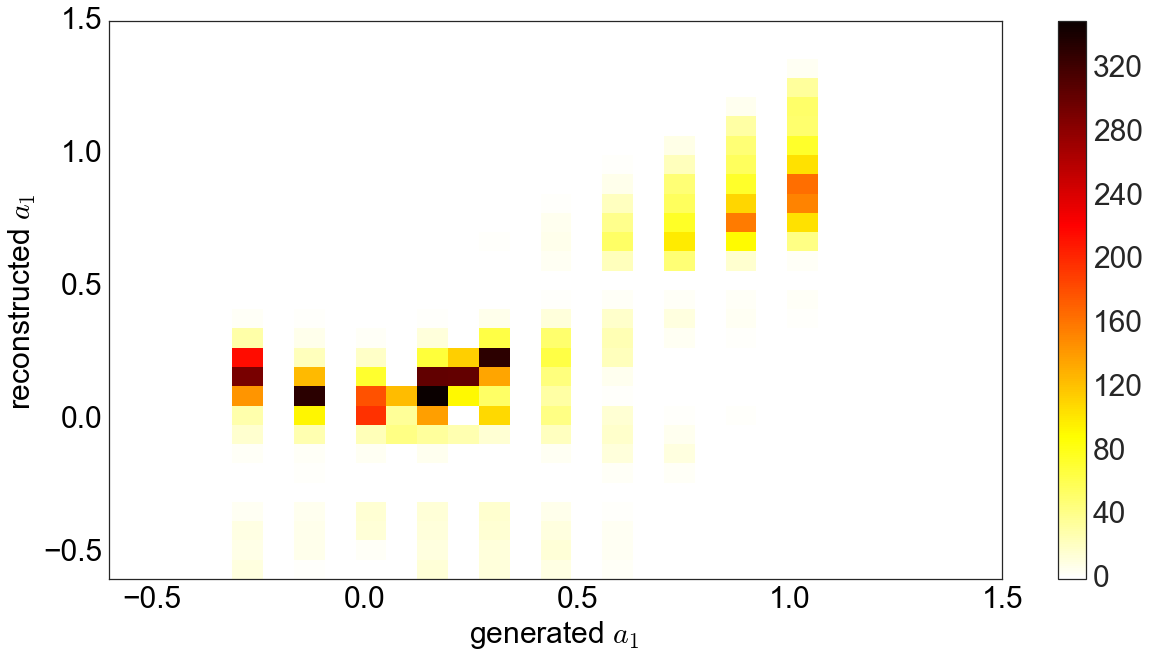

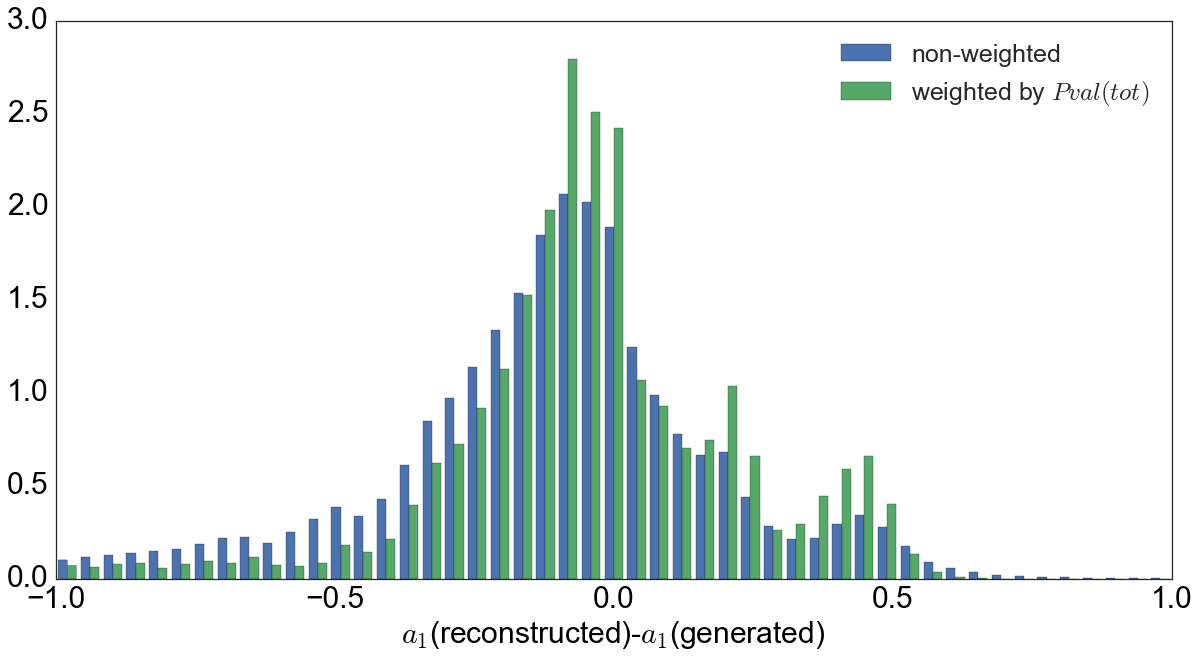

In [32]:
plot_parameter_generated_reconstructed(par='SigmaZa1',par_name='a1',par_label='$a_1$',units='',
                                       bins=np.linspace(-0.6,1.5,30),bins_diff=np.linspace(-1.,1.,50),
                                      do_save_plots=True)

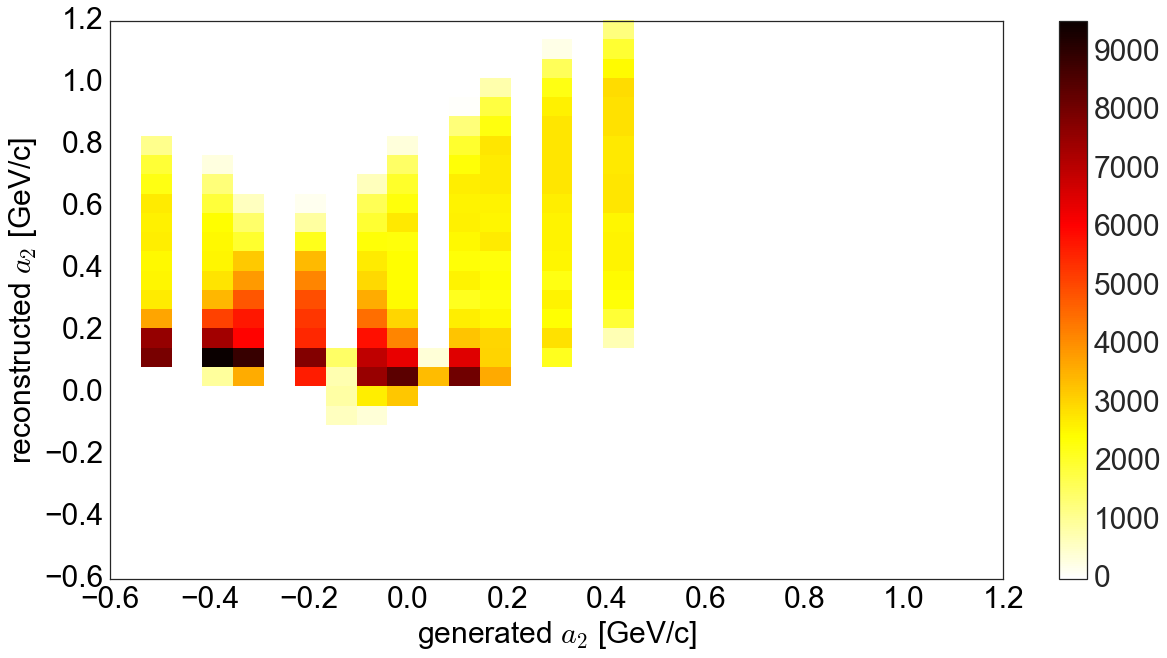

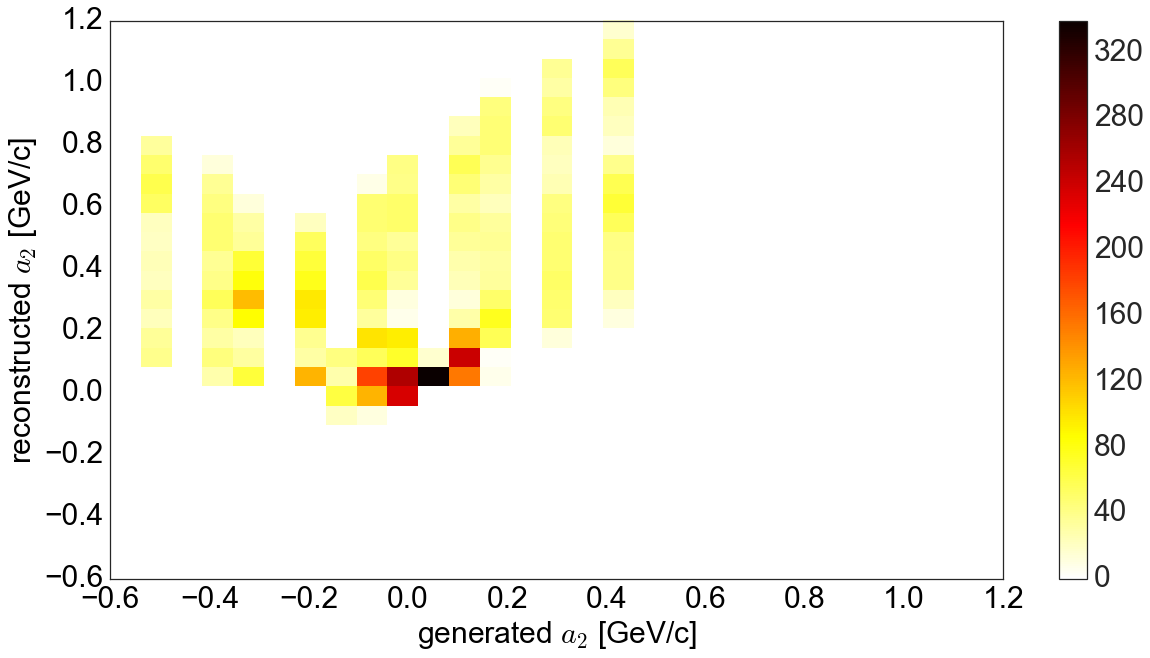

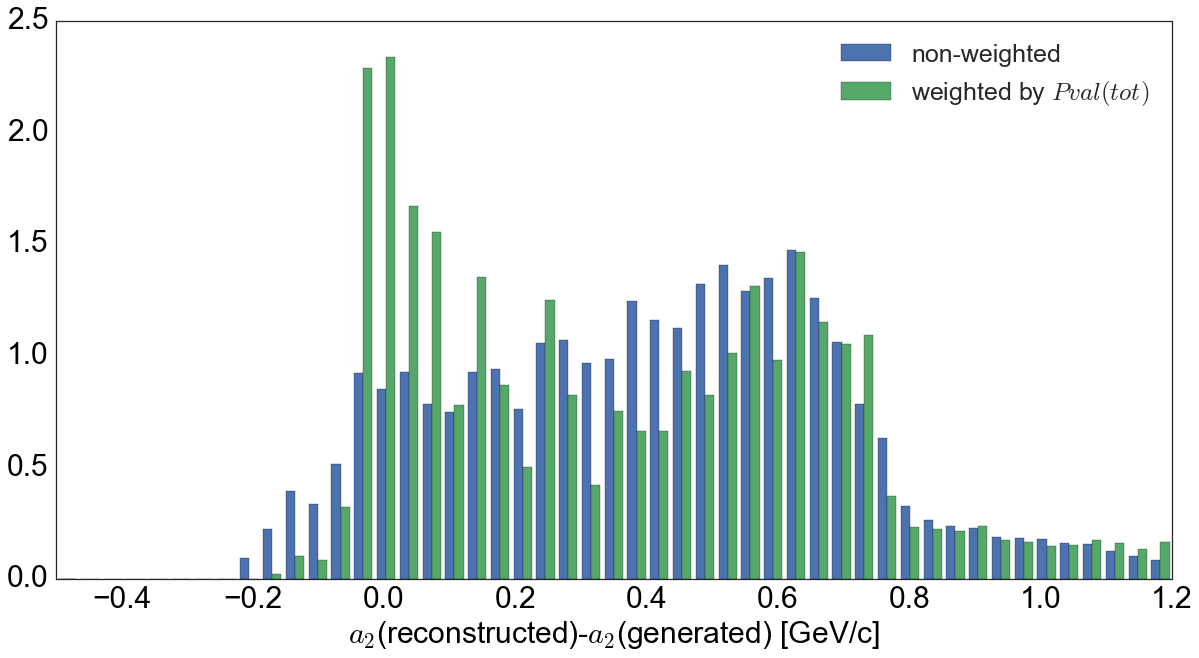

In [33]:
plot_parameter_generated_reconstructed(par='SigmaZa2',par_name='a2',par_label='$a_2$',
                                       bins=np.linspace(-0.6,1.2,30),bins_diff=np.linspace(-.5,1.2,50),
                                      do_save_plots=True)

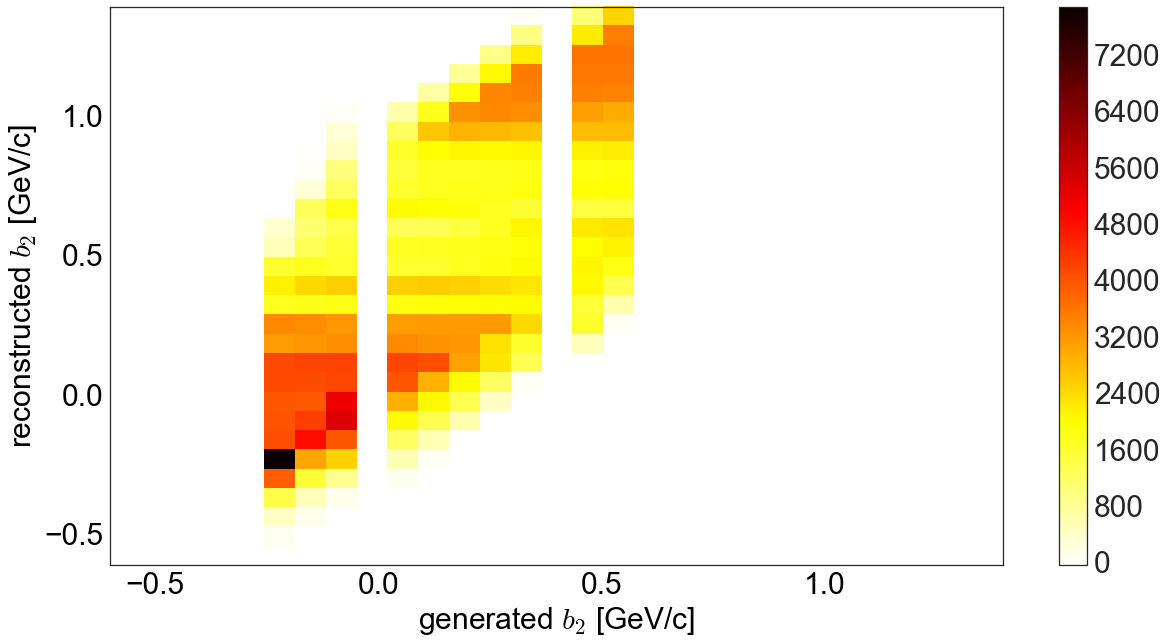

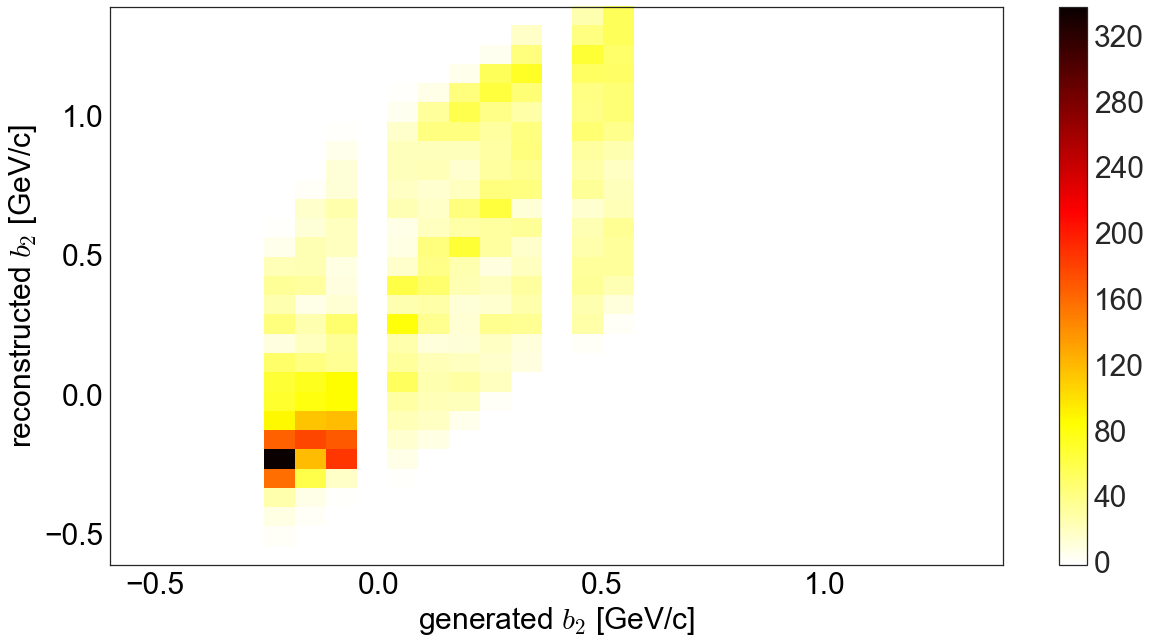

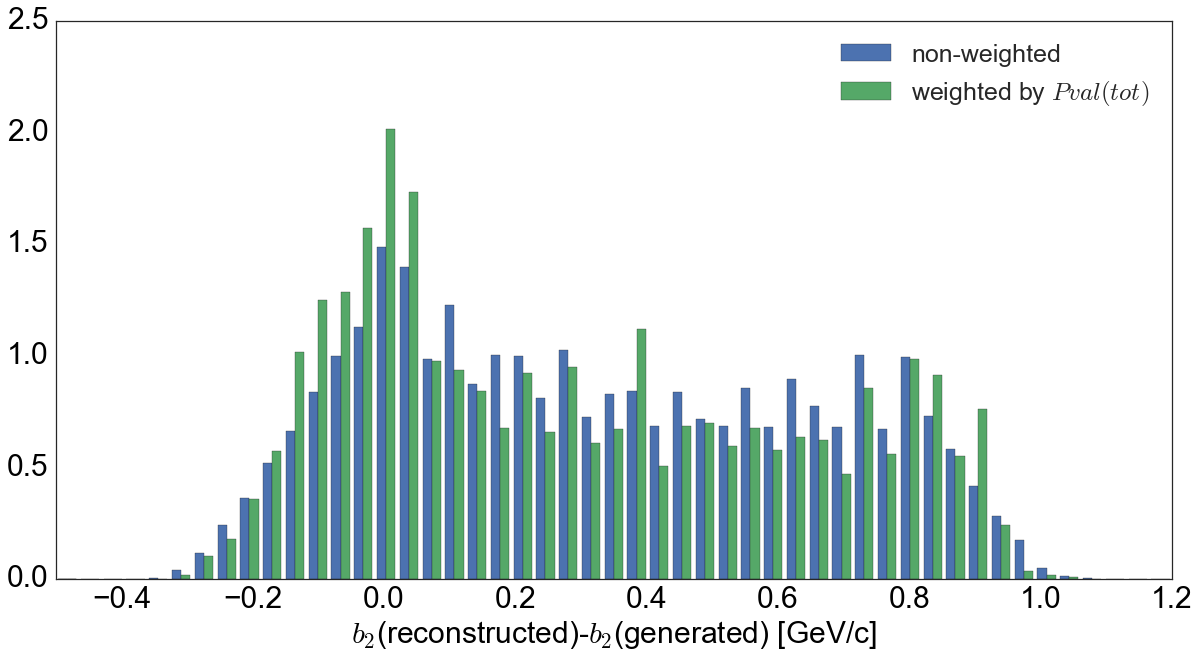

In [35]:
plot_parameter_generated_reconstructed(par='MeanZa2',par_name='b2',par_label='$b_2$',
                                       bins=np.linspace(-0.6,1.4,30),bins_diff=np.linspace(-.5,1.2,50),
                                      do_save_plots=True)

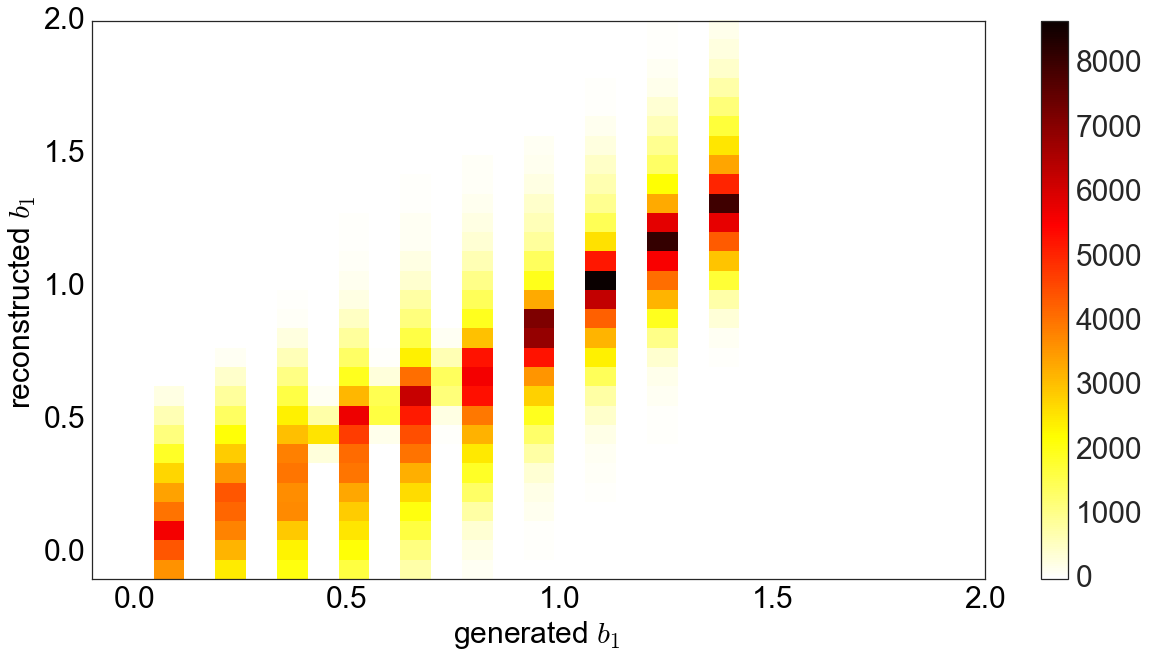

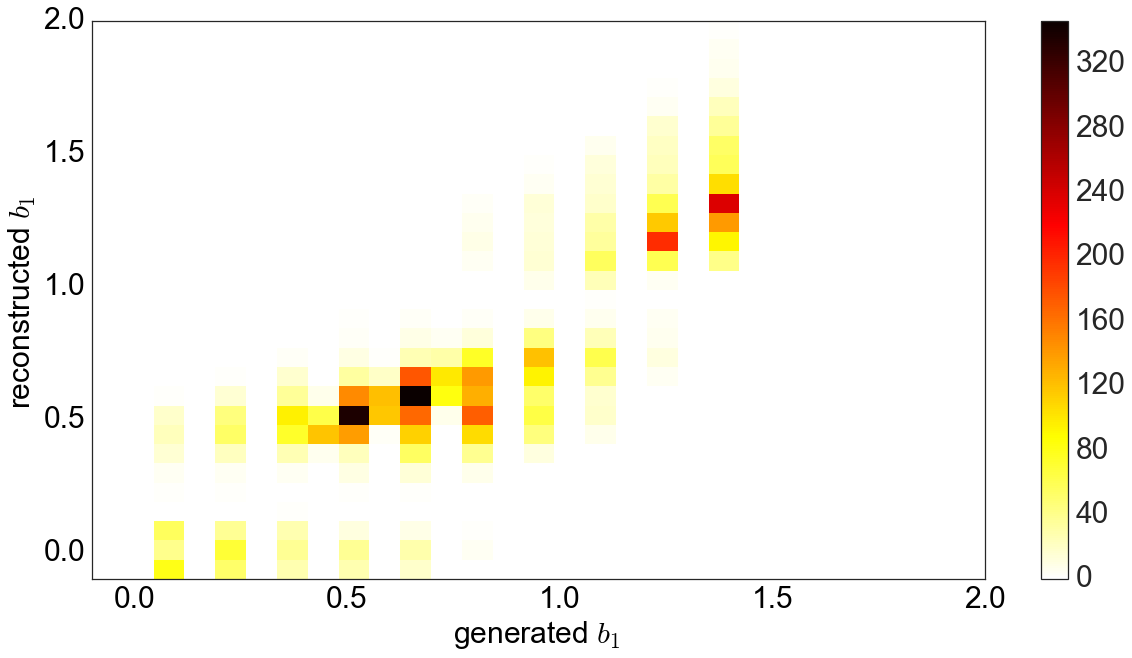

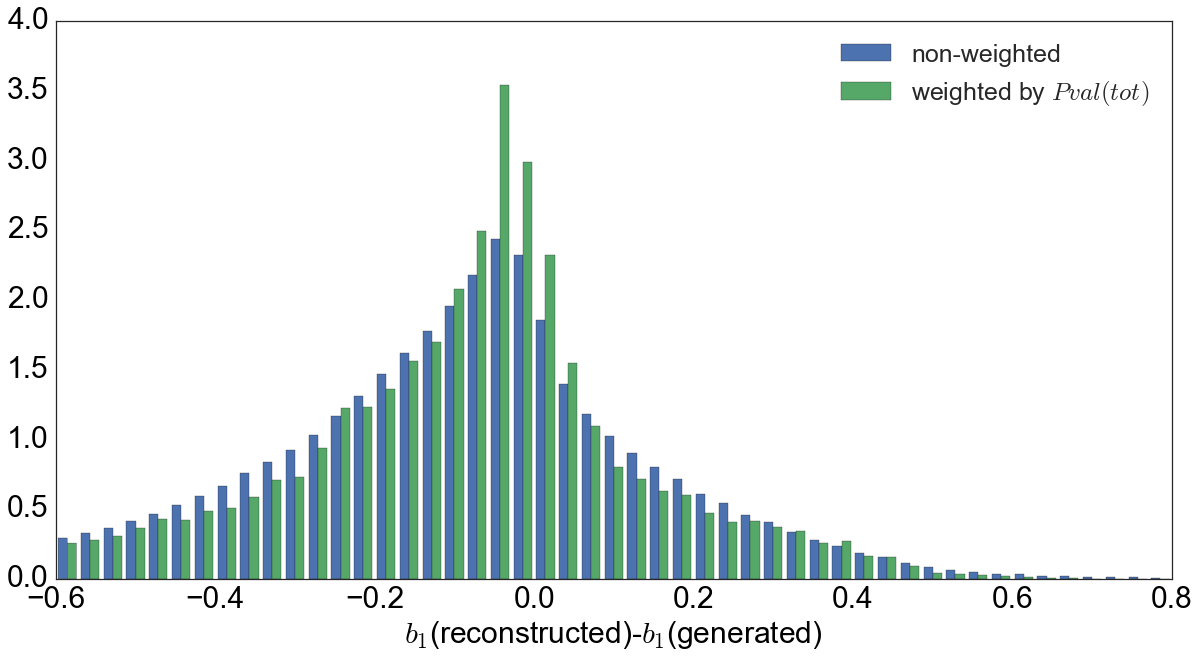

In [39]:
plot_parameter_generated_reconstructed(par='MeanZa1',par_name='b1',par_label='$b_1$',units='',
                                       bins=np.linspace(-0.1,2.0,30),bins_diff=np.linspace(-.6,0.8,50),
                                      do_save_plots=True)